In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset, num2date, date2num
from datetime import datetime

#For Map
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker 
from matplotlib.patches import Rectangle

#Stuff for Meteorological calculations 
import metpy.calc as mpcalc
from metpy.plots import SkewT
from metpy.units import units

#Next thing: we need to know open up every file in the Dean Directory and loop through them!
import glob
import pandas as pd

#For stats
from scipy.stats import skew, norm

In [2]:
path = '/Users/cjmasiel/Desktop/Larson_Class/Hw_2/HadISST.194801-202012.nc'

In [3]:
#open our netCDF file using xarray
dataset = xr.open_dataset(path)    
dataset

<xarray.Dataset>
Dimensions:    (time: 876, longitude: 360, latitude: 180, nv: 2)
Coordinates:
  * time       (time) datetime64[ns] 1948-01-16T12:00:00 ... 2020-12-16T12:00:00
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.9.8 (https:/...
    Conventions:                CF-1.0
    history:                    Wed Jun 09 11:12:12 2021: cdo selyear,1948/20...
    source:                     HadISST
    institution:                Met Office Hadley Centre
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...
    CDO:                        Climate Data Operators version 1.9.8 (https:/...

In [4]:
#read in variables of interest
lat = dataset['latitude']
lon = dataset['longitude']
sst = dataset['sst']

print(lon.values)

[-179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 -172.5 -171.5 -170.5
 -169.5 -168.5 -167.5 -166.5 -165.5 -164.5 -163.5 -162.5 -161.5 -160.5
 -159.5 -158.5 -157.5 -156.5 -155.5 -154.5 -153.5 -152.5 -151.5 -150.5
 -149.5 -148.5 -147.5 -146.5 -145.5 -144.5 -143.5 -142.5 -141.5 -140.5
 -139.5 -138.5 -137.5 -136.5 -135.5 -134.5 -133.5 -132.5 -131.5 -130.5
 -129.5 -128.5 -127.5 -126.5 -125.5 -124.5 -123.5 -122.5 -121.5 -120.5
 -119.5 -118.5 -117.5 -116.5 -115.5 -114.5 -113.5 -112.5 -111.5 -110.5
 -109.5 -108.5 -107.5 -106.5 -105.5 -104.5 -103.5 -102.5 -101.5 -100.5
  -99.5  -98.5  -97.5  -96.5  -95.5  -94.5  -93.5  -92.5  -91.5  -90.5
  -89.5  -88.5  -87.5  -86.5  -85.5  -84.5  -83.5  -82.5  -81.5  -80.5
  -79.5  -78.5  -77.5  -76.5  -75.5  -74.5  -73.5  -72.5  -71.5  -70.5
  -69.5  -68.5  -67.5  -66.5  -65.5  -64.5  -63.5  -62.5  -61.5  -60.5
  -59.5  -58.5  -57.5  -56.5  -55.5  -54.5  -53.5  -52.5  -51.5  -50.5
  -49.5  -48.5  -47.5  -46.5  -45.5  -44.5  -43.5  -42.5  -41.5  -40.5
  -39.

In [5]:
lat_of_interest =  36   #in degrees, southern hemisphere is negative 
lon_of_interest = -40  #in degrees, western hemisphere is negative 

In [6]:
#Now, we want to look at a specific indice, of lat and lon, we will use numpy to achieve this
# Find the index where the latitude value is closest to 15
index_lat = np.abs(lat - lat_of_interest).argmin()

print(f"Index where latitude is closest to {lat_of_interest}°:", index_lat)

# Find the index where the latitude value is closest to 15
index_lon = np.abs(lon - lon_of_interest).argmin()

print(f"Index where longitude is closest to {lon_of_interest}°", index_lon)

Index where latitude is closest to 36°: <xarray.DataArray 'latitude' ()>
array(53)
Index where longitude is closest to -40° <xarray.DataArray 'longitude' ()>
array(139)


In [7]:
#now, lets print out a sst time series for our desired location

sst_random_atlantic = sst[:,index_lat,index_lon]

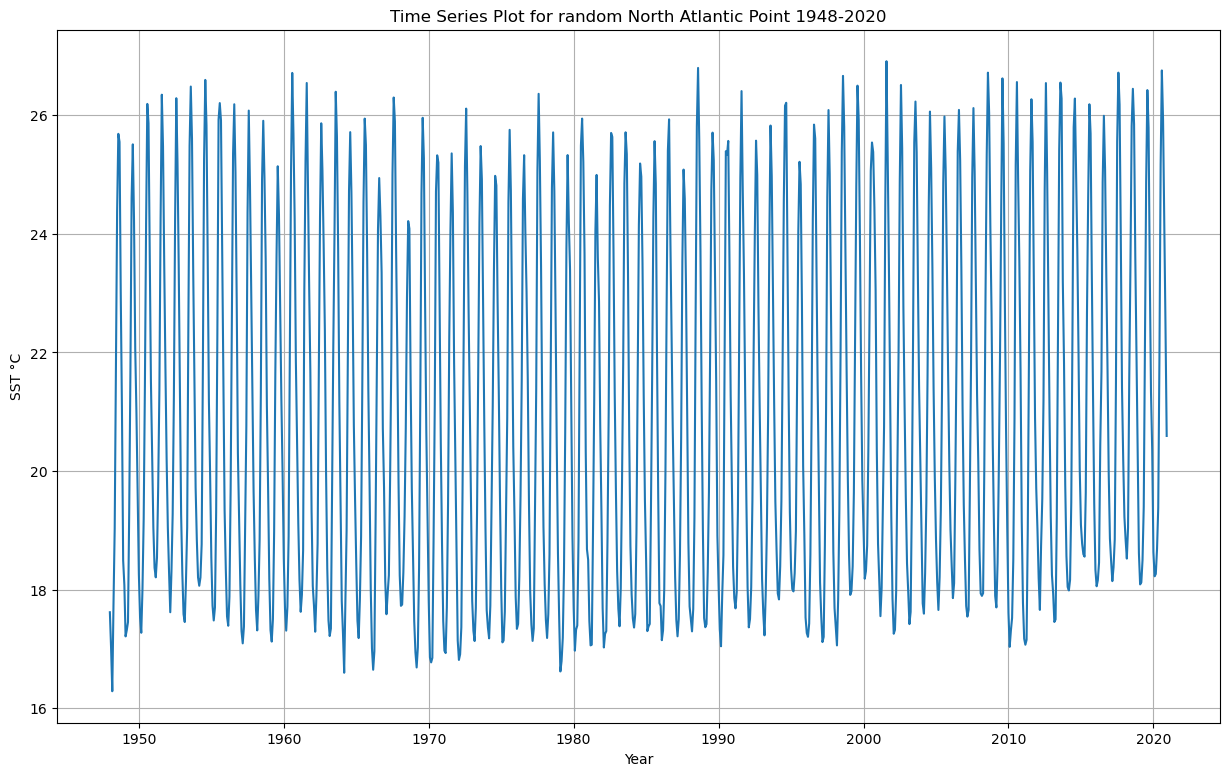

In [8]:
# Now plot this time-series

# Spacing for each month (1/12th of a year)
spacing = 1 / 12

# Generating the time axis from 1948 to just before 2021 with monthly spacing
time_axis = np.arange(1948, 2021, spacing)

#plotting information
plt.figure(figsize=(15, 9))

plt.plot(time_axis, sst_random_atlantic)
plt.xlabel('Year')
plt.ylabel('SST °C')
plt.title('Time Series Plot for random North Atlantic Point 1948-2020')
plt.grid()
plt.show()

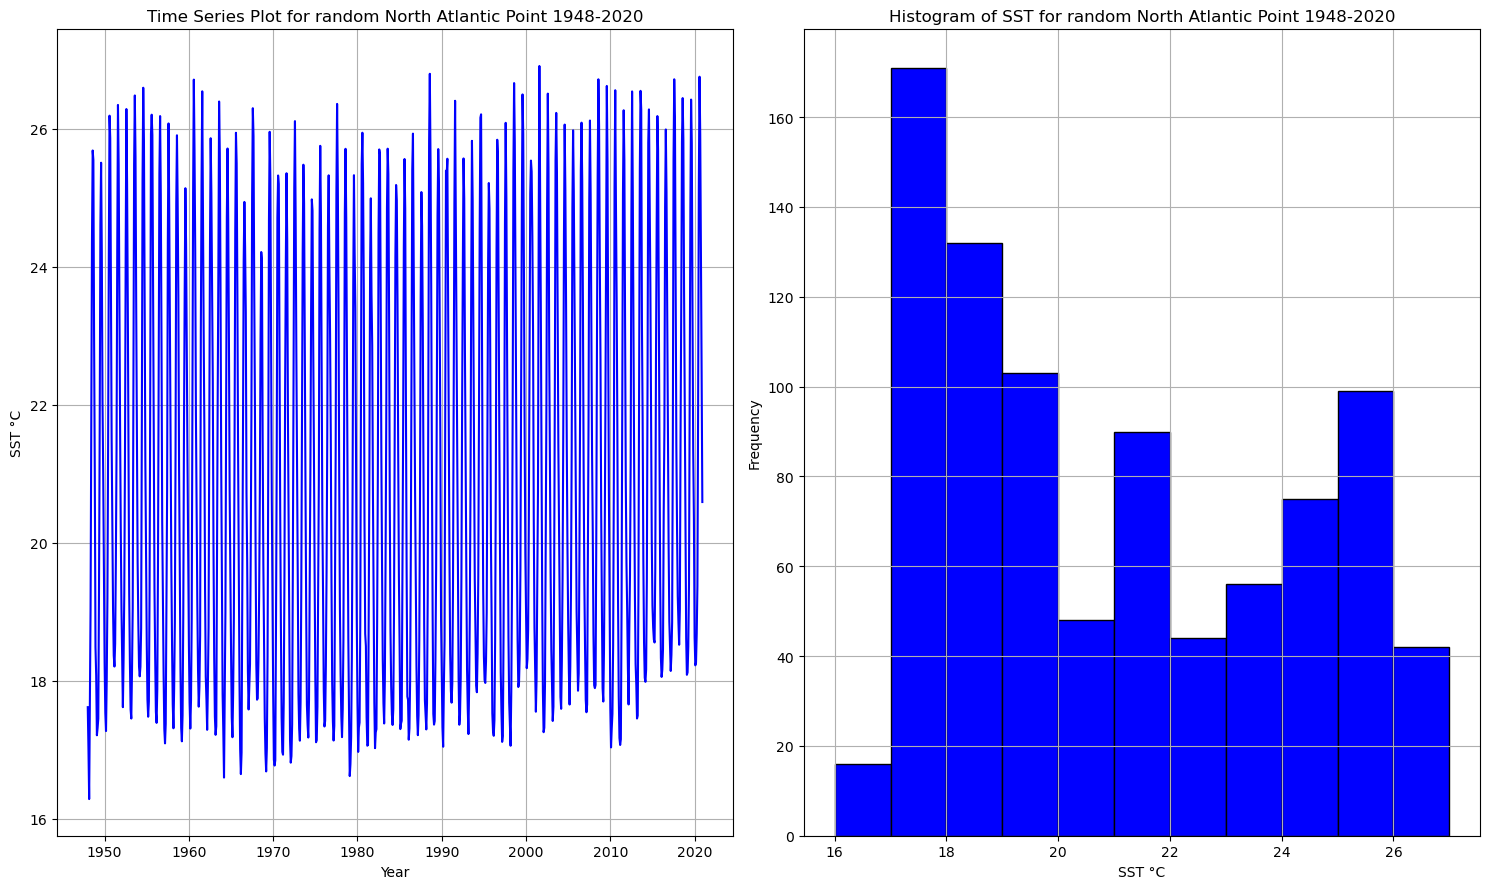

In [9]:
#plotting information
plt.figure(figsize=(15, 9))

# Plotting the time series
plt.subplot(1, 2, 1)
plt.plot(time_axis, sst_random_atlantic,color='Blue')
plt.xlabel('Year')
plt.ylabel('SST °C')
plt.title('Time Series Plot for random North Atlantic Point 1948-2020')
plt.grid()

# Creating a histogram
plt.subplot(1, 2, 2)

#specify bins
bins = np.arange(16,28,1)
plt.hist(sst_random_atlantic, bins=bins, color='Blue', edgecolor='black')
plt.xlabel('SST °C')
plt.ylabel('Frequency')
plt.title('Histogram of SST for random North Atlantic Point 1948-2020')
plt.grid()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

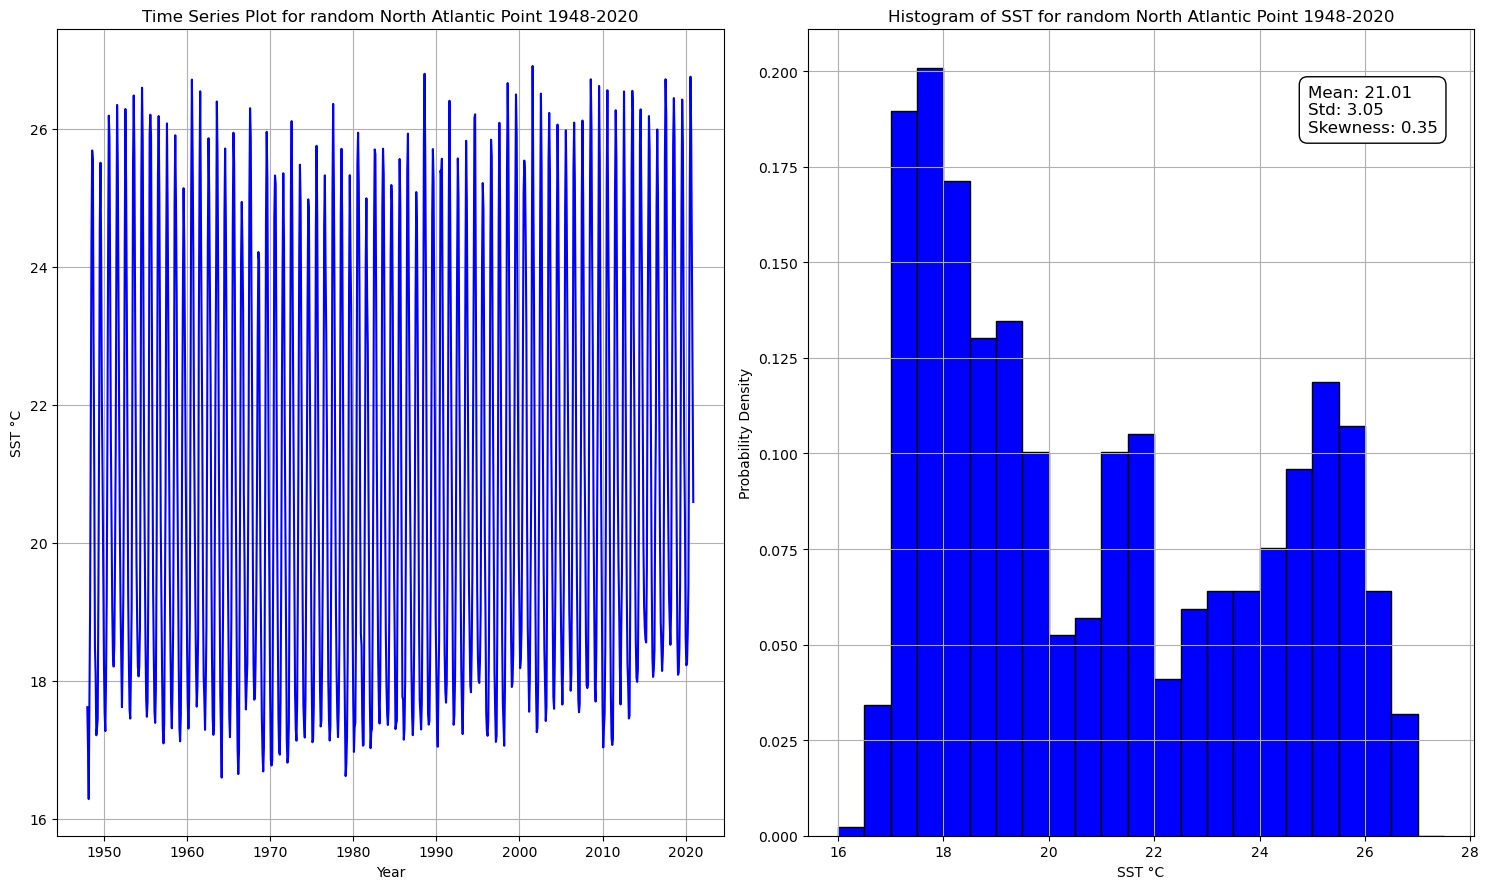

In [10]:
# Convert DataArray to NumPy array
sst_random_atlantic = np.asarray(sst_random_atlantic)

# Calculate mean, std, and skewness
mean_value = np.mean(sst_random_atlantic)
std_value = np.std(sst_random_atlantic)
skewness_value = skew(sst_random_atlantic)

# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(15, 9))

# Plotting the time series
plt.subplot(1, 2, 1)
plt.plot(time_axis, sst_random_atlantic, color='Blue')
plt.xlabel('Year')
plt.ylabel('SST °C')
plt.title('Time Series Plot for random North Atlantic Point 1948-2020')
plt.grid()

# Creating a histogram with specified bins
plt.subplot(1, 2, 2)
bins = np.arange(16,28,.5)
plt.hist(sst_random_atlantic, bins=bins, color='blue', edgecolor='black',density=True)
plt.xlabel('SST °C')
plt.ylabel('Probability Density')
plt.title('Histogram of SST for random North Atlantic Point 1948-2020')
plt.grid()

# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Adjust layout to prevent overlap

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
############################################################################
#Beginning of HW 2, lets take a look at a location in the tropical Pacific, at 0° located approximately at 140W
############################################################################

In [12]:
lat_of_interest =  0   #in degrees, southern hemisphere is negative 
lon_of_interest = -140  #in degrees, western hemisphere is negative 

In [13]:
#Now, we want to look at a specific indice, of lat and lon, we will use numpy to achieve this
# Find the index where the latitude value is closest to 15
index_lat = np.abs(lat - lat_of_interest).argmin()

print(f"Index where latitude is closest to {lat_of_interest}°:", index_lat)

# Find the index where the latitude value is closest to 15
index_lon = np.abs(lon - lon_of_interest).argmin()

print(f"Index where longitude is closest to {lon_of_interest}°", index_lon)

Index where latitude is closest to 0°: <xarray.DataArray 'latitude' ()>
array(89)
Index where longitude is closest to -140° <xarray.DataArray 'longitude' ()>
array(39)


In [14]:
#now, lets print out a sst time series for our desired location

sst_eq_pac = sst[:,index_lat,index_lon]

In [15]:
#a

# Spacing for each month (1/12th of a year)
spacing = 1 / 12

# Generating the time axis from 1948 to just before 2021 with monthly spacing
time_axis = np.arange(1948, 2021, spacing)

# Convert DataArray to NumPy array
sst_eq_pac = np.asarray(sst_eq_pac)

# Calculate mean, std, and skewness
mean_value = np.mean(sst_eq_pac)
std_value = np.std(sst_eq_pac)
skewness_value = skew(sst_eq_pac)

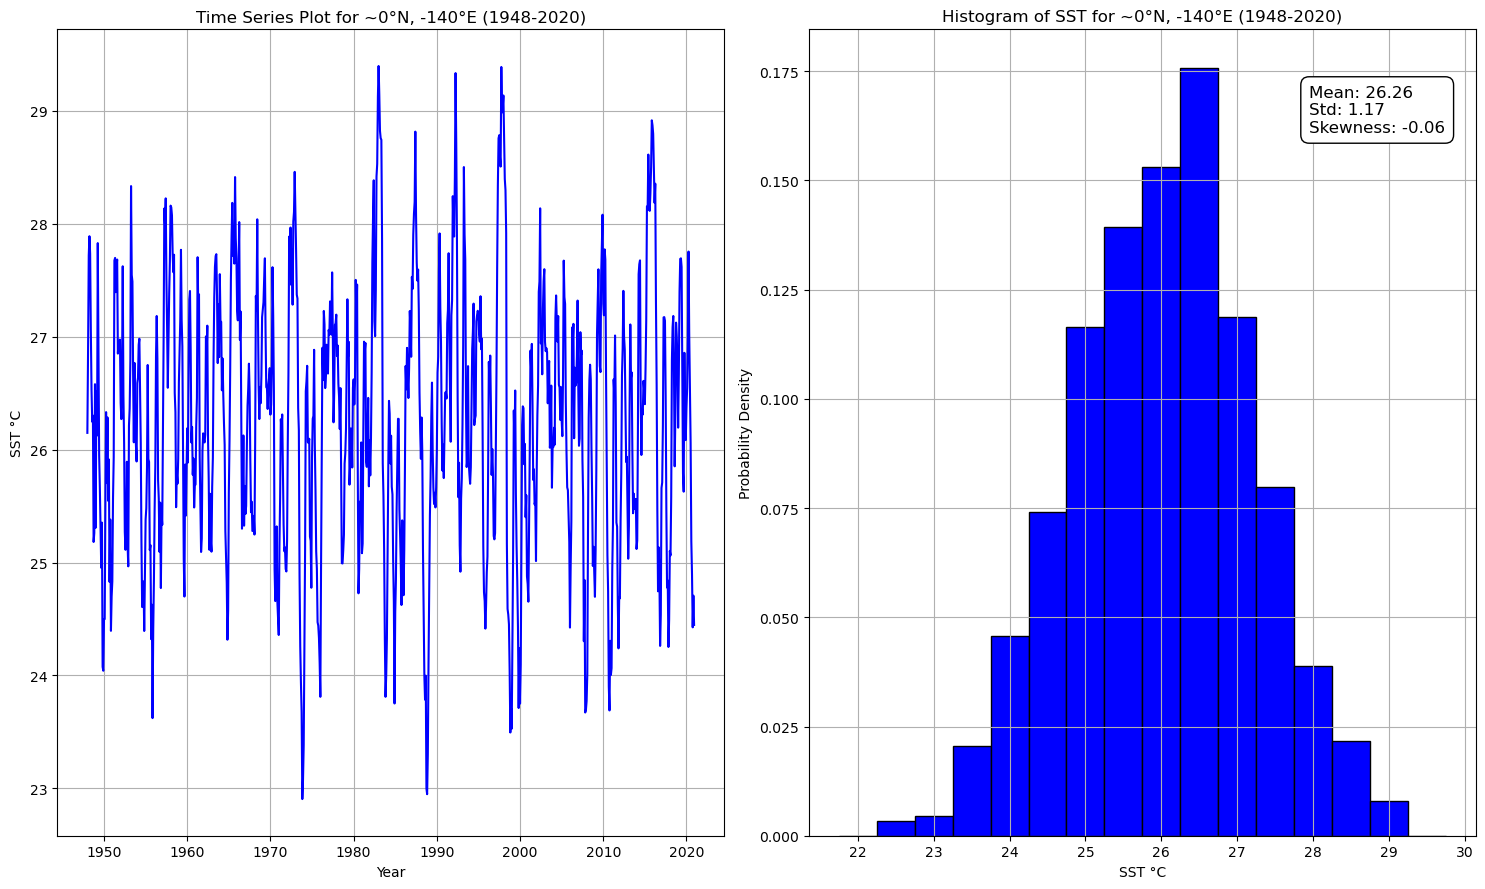

In [30]:
# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(15, 9))

# Plotting the time series
plt.subplot(1, 2, 1)
plt.plot(time_axis, sst_eq_pac, color='Blue')
plt.xlabel('Year')
plt.ylabel('SST °C')
plt.title(f'Time Series Plot for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2020)')
plt.grid()

# Create the histogram
plt.subplot(1, 2, 2)

#first, specify our bins, you have to change these values manually
bins = np.arange(22, 30.5, 0.5)

hist, bin_edges = np.histogram(sst_eq_pac, bins=bins, density=True)

# Adjust the histogram values by multiplying with 0.5
hist_adjusted = hist * 0.5

# Plot the adjusted histogram
plt.bar(bin_edges[:-1], hist_adjusted, width=np.diff(bin_edges), color='blue', edgecolor='black')

plt.xlabel('SST °C')
plt.ylabel('Probability Density')
plt.title(f'Histogram of SST for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2020)')
plt.grid()


# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

Area under histogram =  1.0


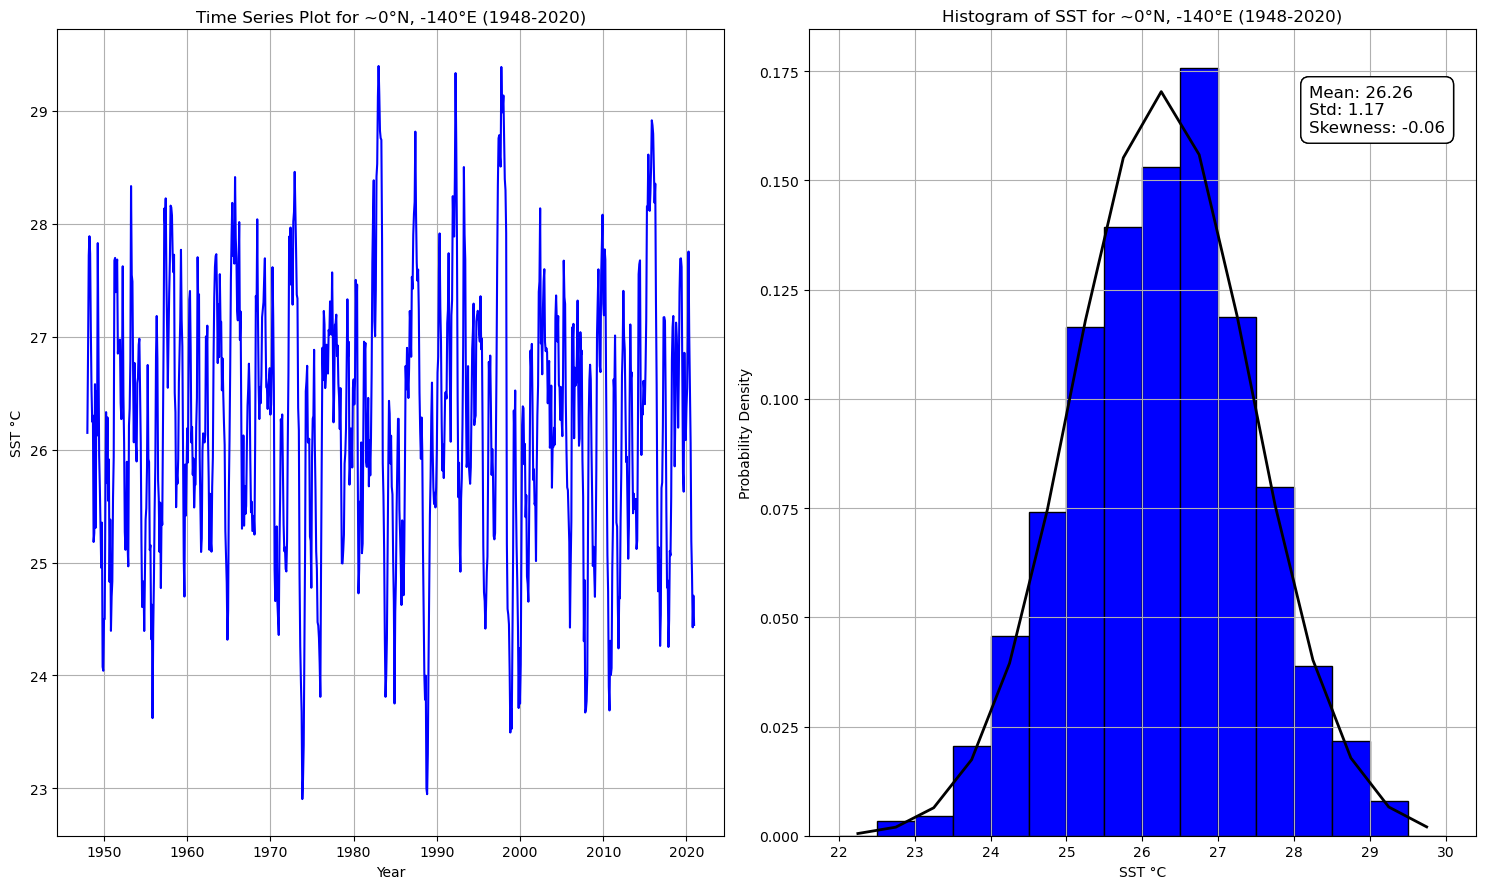

In [34]:
#c

# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(15, 9))

# Plotting the time series
plt.subplot(1, 2, 1)
plt.plot(time_axis, sst_eq_pac, color='Blue')
plt.xlabel('Year')
plt.ylabel('SST °C')
plt.title(f'Time Series Plot for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2020)')
plt.grid()

# Create the histogram
plt.subplot(1, 2, 2)

bins = np.arange(22, 30.5, 0.5)

hist, bin_edges = np.histogram(sst_eq_pac, bins=bins, density=True)

# Adjust the histogram values by multiplying with 0.5
hist_adjusted = hist * 0.5

# Adjust the bin_edges to shift the bars to the right
adjusted_bin_edges = bin_edges[:-1] + np.diff(bin_edges) / 2

# Plot the adjusted histogram
plt.bar(adjusted_bin_edges, hist_adjusted, width=np.diff(bin_edges), color='blue', edgecolor='black')
#plt.bar(bin_edges[:-1], hist_adjusted, width=np.diff(bin_edges), color='blue', edgecolor='black')

plt.xlabel('SST °C')
plt.ylabel('Probability Density')
plt.title(f'Histogram of SST for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2020)')
plt.grid()


# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


#calculate area under histogram
bin_widths = np.diff(bin_edges)
area_under_histogram = np.sum(hist * bin_widths)
print("Area under histogram = ", area_under_histogram)

# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

#linespacing = 0.5
n_space = 0.5

# Adding a normal probability density function curve
bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p = norm.pdf(bin_centers, mean_value, std_value)
area_under_curve = np.trapz(p, bin_centers)                # Calculate the area under the curve using the trapezoidal rule
p_normalized = (p / area_under_curve) * n_space            # Normalize the PDF
plt.plot(bin_centers, p_normalized, 'k', linewidth=2, label='SST Climatology')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [18]:
#1d

'''
For the figure produced above, I think the normal distribution is by far the best fit for the give data.
While there is a slight skewness, where the observed values are slightly warmer, especially near the maximum
of the curve, than the normal fit, it is very close. This is easily seen in the skewness value of -.06, which
is very close to 0 indicating very small skewness is apparent in the data. 

'''

'\nFor the figure produced above, I think the normal distribution is by far the best fit for the give data.\nWhile there is a slight skewness, where the observed values are slightly warmer, especially near the maximum\nof the curve, than the normal fit, it is very close. This is easily seen in the skewness value of -.06, which\nis very close to 0 indicating very small skewness is apparent in the data. \n\n'

Area under histogram =  1.0


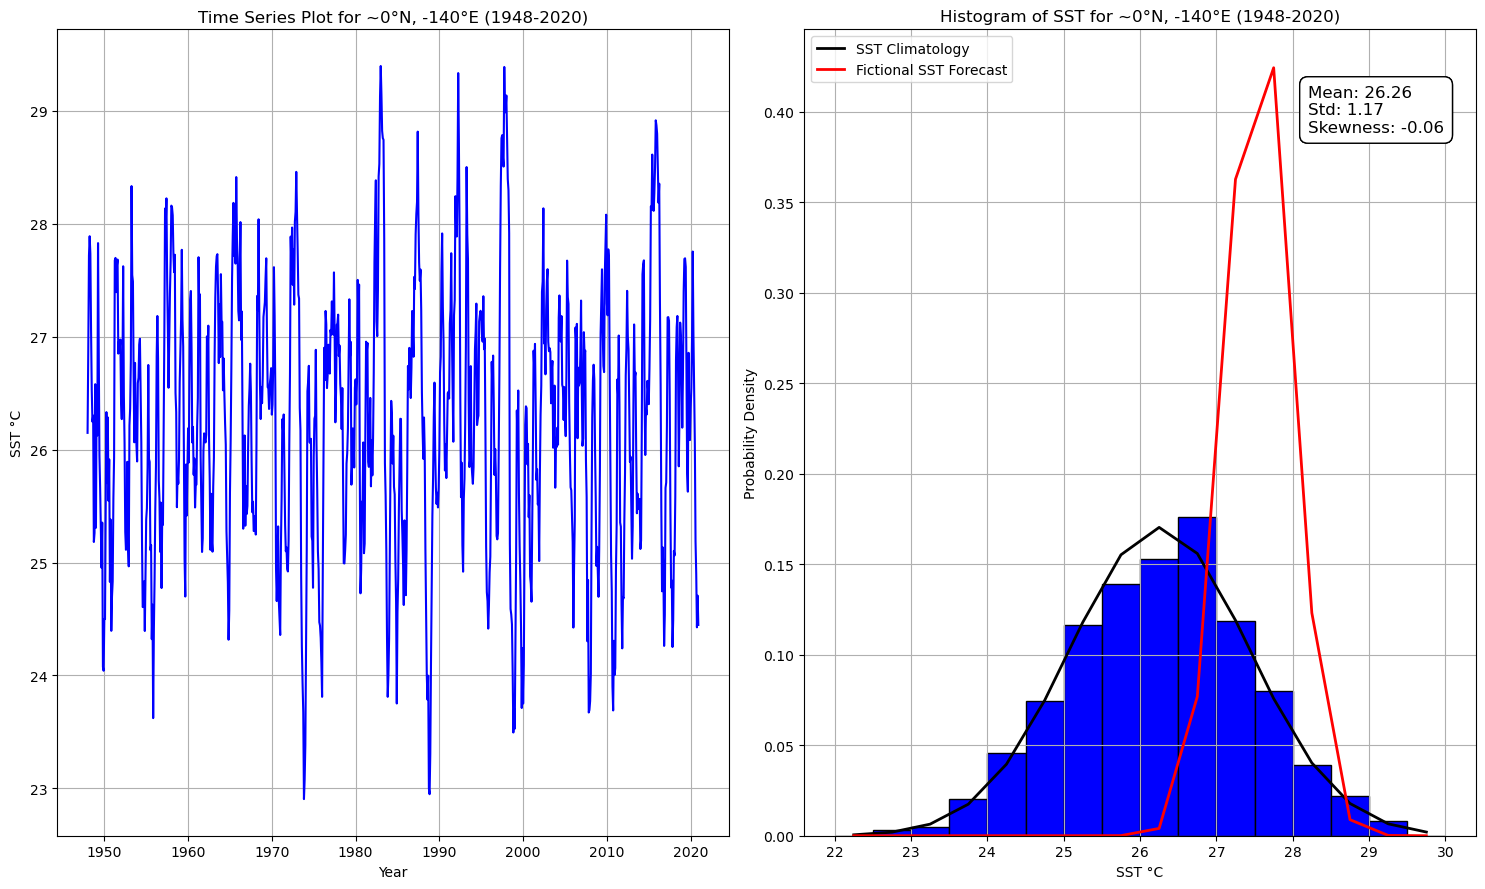

In [35]:
# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(15, 9))

# Plotting the time series
plt.subplot(1, 2, 1)
plt.plot(time_axis, sst_eq_pac, color='Blue')
plt.xlabel('Year')
plt.ylabel('SST °C')
plt.title(f'Time Series Plot for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2020)')
plt.grid()

# Create the histogram
plt.subplot(1, 2, 2)

bins = np.arange(22, 30.5, 0.5)

hist, bin_edges = np.histogram(sst_eq_pac, bins=bins, density=True)

# Adjust the histogram values by multiplying with 0.5
hist_adjusted = hist * 0.5

# Adjust the bin_edges to shift the bars to the right
adjusted_bin_edges = bin_edges[:-1] + np.diff(bin_edges) / 2

# Plot the adjusted histogram
plt.bar(adjusted_bin_edges, hist_adjusted, width=np.diff(bin_edges), color='blue', edgecolor='black')
#plt.bar(bin_edges[:-1], hist_adjusted, width=np.diff(bin_edges), color='blue', edgecolor='black')

plt.xlabel('SST °C')
plt.ylabel('Probability Density')
plt.title(f'Histogram of SST for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2020)')
plt.grid()


# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


#calculate area under histogram
bin_widths = np.diff(bin_edges)
area_under_histogram = np.sum(hist * bin_widths)
print("Area under histogram = ", area_under_histogram)

# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

#linespacing = 0.5
n_space = 0.5

# Adding a normal probability density function curve
bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p = norm.pdf(bin_centers, mean_value, std_value)
area_under_curve = np.trapz(p, bin_centers)                # Calculate the area under the curve using the trapezoidal rule
p_normalized = (p / area_under_curve) * n_space            # Normalize the PDF
plt.plot(bin_centers, p_normalized, 'k', linewidth=2, label='SST Climatology')

# Adding a normal probability density function curve for forecasted fictional values
xmin, xmax = plt.xlim()

bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p_new = norm.pdf(bin_centers, mean_value + 1.3, std_value -.75)
area_under_curve_f = np.trapz(p_new, bin_centers)
p_normalized_f = (p_new / area_under_curve_f) * n_space    # Normalize the PDF
plt.plot(bin_centers, p_normalized_f, 'red', linewidth=2, label = 'Fictional SST Forecast')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.legend(loc='upper left')

# Display the plot
plt.show()

In [36]:
print("The Sum under the climatological curve:", sum(p_normalized))
print("The Sum under the Forecasted curve:", sum(p_normalized_f))

The Sum under the climatological curve: 1.0012631383984627
The Sum under the Forecasted curve: 1.000000349830854


Area under histogram =  1.0


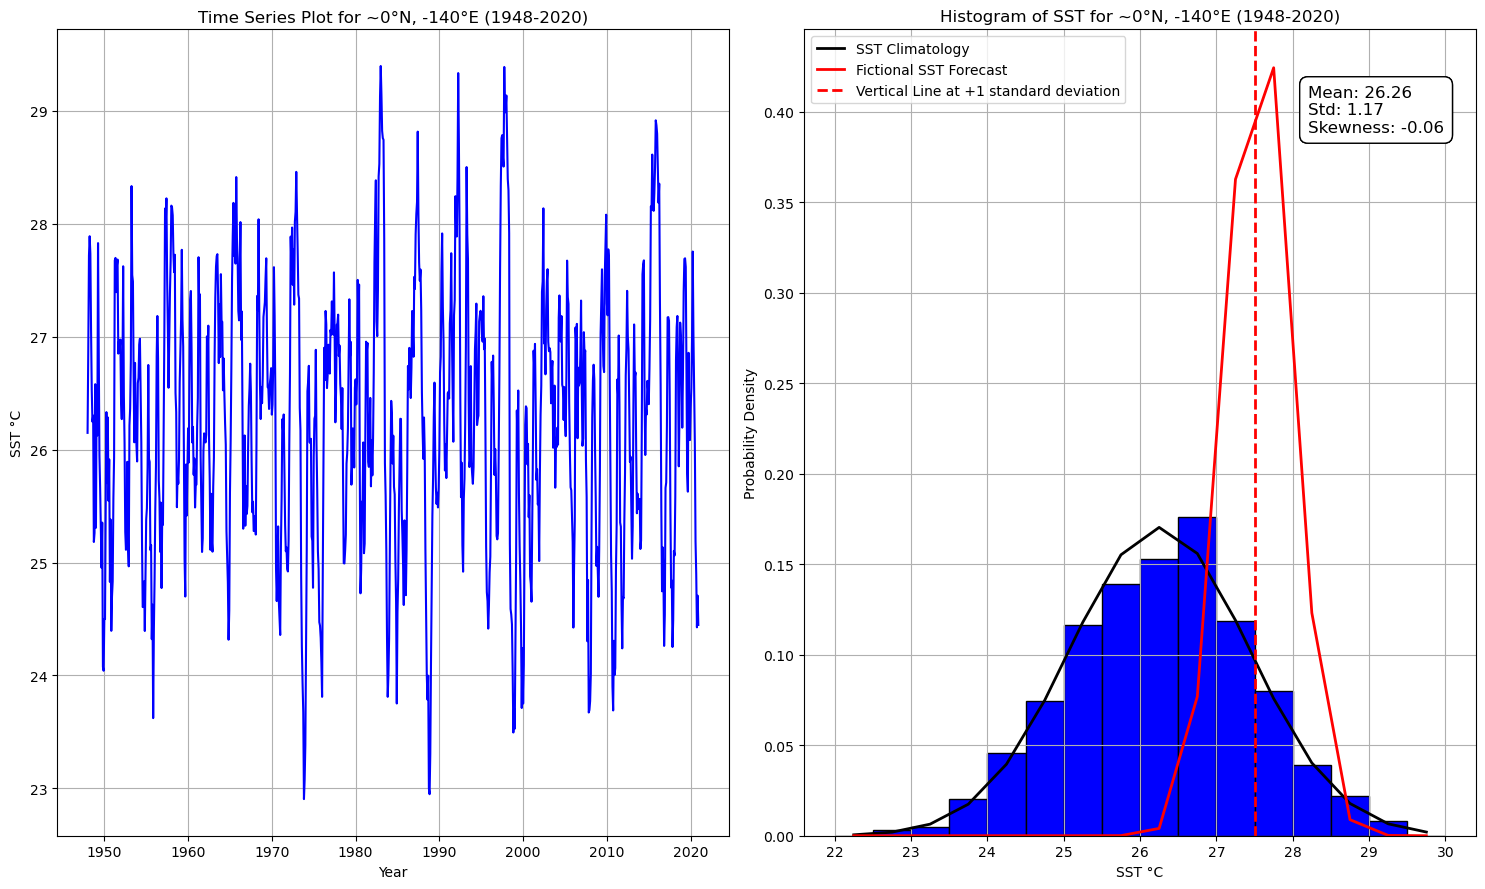

In [38]:
#1G

'''
Warmer than normal is defined as as greater than +1 standard deviation, from the climatological distribution.
Calculate the probability of randomly selecting a value warmer than normal from the climatological distribution
and then seperately, the forecast distribution. Round to the nearest percent
'''

# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(15, 9))

# Plotting the time series
plt.subplot(1, 2, 1)
plt.plot(time_axis, sst_eq_pac, color='Blue')
plt.xlabel('Year')
plt.ylabel('SST °C')
plt.title(f'Time Series Plot for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2020)')
plt.grid()

# Create the histogram
plt.subplot(1, 2, 2)

bins = np.arange(22, 30.5, 0.5)

hist, bin_edges = np.histogram(sst_eq_pac, bins=bins, density=True)

# Adjust the histogram values by multiplying with 0.5
hist_adjusted = hist * 0.5

# Adjust the bin_edges to shift the bars to the right
adjusted_bin_edges = bin_edges[:-1] + np.diff(bin_edges) / 2

# Plot the adjusted histogram
plt.bar(adjusted_bin_edges, hist_adjusted, width=np.diff(bin_edges), color='blue', edgecolor='black')
#plt.bar(bin_edges[:-1], hist_adjusted, width=np.diff(bin_edges), color='blue', edgecolor='black')

plt.xlabel('SST °C')
plt.ylabel('Probability Density')
plt.title(f'Histogram of SST for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2020)')
plt.grid()


# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


#calculate area under histogram
bin_widths = np.diff(bin_edges)
area_under_histogram = np.sum(hist * bin_widths)
print("Area under histogram = ", area_under_histogram)

# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

#linespacing = 0.5
n_space = 0.5

# Adding a normal probability density function curve
bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p = norm.pdf(bin_centers, mean_value, std_value)
area_under_curve = np.trapz(p, bin_centers)                # Calculate the area under the curve using the trapezoidal rule
p_normalized = (p / area_under_curve) * n_space            # Normalize the PDF
plt.plot(bin_centers, p_normalized, 'k', linewidth=2, label='SST Climatology')

# Adding a normal probability density function curve for forecasted fictional values
xmin, xmax = plt.xlim()

bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p_new = norm.pdf(bin_centers, mean_value + 1.3, std_value -.75)
area_under_curve_f = np.trapz(p_new, bin_centers)
p_normalized_f = (p_new / area_under_curve_f) * n_space    # Normalize the PDF
plt.plot(bin_centers, p_normalized_f, 'red', linewidth=2, label = 'Fictional SST Forecast')

#Next, add a vertical line at +1 sigma to represent what constitutes a warmer than average temp

one_std = round(2 * (mean_value+std_value))/2
plt.axvline(x=one_std, color='red', linestyle='--', linewidth=2, label='Vertical Line at +1 standard deviation')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.legend(loc='upper left')

# Display the plot
plt.show()

In [50]:
#So... 
one_std = round(2 * (mean_value+std_value))/2

#given this, we see that 27.5 is the bin cut off: 
bins_warm = [27.75, 28.25, 28.75, 29.25, 29.75]

print(p_normalized)
print(bin_centers)

[0.00050147 0.00196154 0.00639886 0.01740839 0.0394971  0.07473474
 0.11793171 0.15519914 0.17033298 0.15590458 0.11900623 0.07575847
 0.04022012 0.01780764 0.00657536 0.00202481]
[22.25 22.75 23.25 23.75 24.25 24.75 25.25 25.75 26.25 26.75 27.25 27.75
 28.25 28.75 29.25 29.75]


In [62]:
#area under the curve will just be a sum of the p_norm values

#area under the curve for specified values
warm = []

for i in range(len(bin_centers)):
    if bin_centers[i] >= 27.5:
        warm.append(p_normalized[i])
    
(f"Probability of selecting a Climatological Value Warmer Than Normal, >= 27.5 °C: {100 * sum(warm):.2f} %")    

'Probability of selecting a Climatological Value Warmer Than Normal, >= 27.5 °C: 14.24 %'

In [63]:
#area under the curve will just be a sum of the p_norm_f values

#area under the curve for specified values
warm_f = []

for i in range(len(bin_centers)):
    if bin_centers[i] >= 27.5:
        warm_f.append(p_normalized_f[i])
    
(f"Percent of Forecast Distribution Warmer Than Normal, >= 27.5 °C: {100 *sum(warm_f):.2f} %")    

'Percent of Forecast Distribution Warmer Than Normal, >= 27.5 °C: 55.64 %'

Area under histogram =  1.0


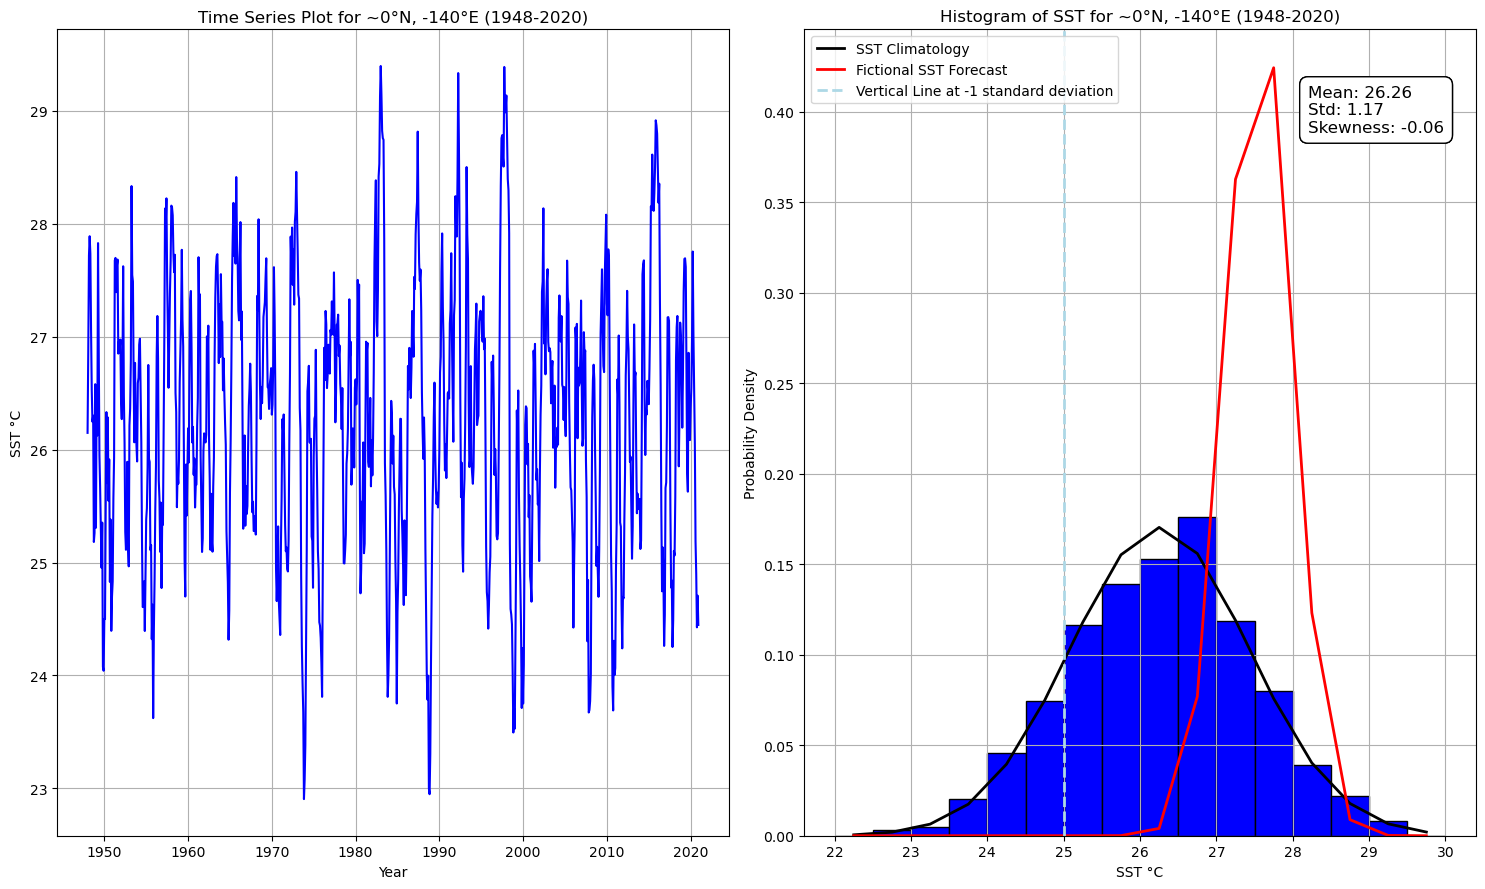

In [61]:
#1H

# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(15, 9))

# Plotting the time series
plt.subplot(1, 2, 1)
plt.plot(time_axis, sst_eq_pac, color='Blue')
plt.xlabel('Year')
plt.ylabel('SST °C')
plt.title(f'Time Series Plot for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2020)')
plt.grid()

# Create the histogram
plt.subplot(1, 2, 2)

bins = np.arange(22, 30.5, 0.5)

hist, bin_edges = np.histogram(sst_eq_pac, bins=bins, density=True)

# Adjust the histogram values by multiplying with 0.5
hist_adjusted = hist * 0.5

# Adjust the bin_edges to shift the bars to the right
adjusted_bin_edges = bin_edges[:-1] + np.diff(bin_edges) / 2

# Plot the adjusted histogram
plt.bar(adjusted_bin_edges, hist_adjusted, width=np.diff(bin_edges), color='blue', edgecolor='black')
#plt.bar(bin_edges[:-1], hist_adjusted, width=np.diff(bin_edges), color='blue', edgecolor='black')

plt.xlabel('SST °C')
plt.ylabel('Probability Density')
plt.title(f'Histogram of SST for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2020)')
plt.grid()


# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


#calculate area under histogram
bin_widths = np.diff(bin_edges)
area_under_histogram = np.sum(hist * bin_widths)
print("Area under histogram = ", area_under_histogram)

# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

#linespacing = 0.5
n_space = 0.5

# Adding a normal probability density function curve
bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p = norm.pdf(bin_centers, mean_value, std_value)
area_under_curve = np.trapz(p, bin_centers)                # Calculate the area under the curve using the trapezoidal rule
p_normalized = (p / area_under_curve) * n_space            # Normalize the PDF
plt.plot(bin_centers, p_normalized, 'k', linewidth=2, label='SST Climatology')

# Adding a normal probability density function curve for forecasted fictional values
xmin, xmax = plt.xlim()

bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p_new = norm.pdf(bin_centers, mean_value + 1.3, std_value -.75)
area_under_curve_f = np.trapz(p_new, bin_centers)
p_normalized_f = (p_new / area_under_curve_f) * n_space    # Normalize the PDF
plt.plot(bin_centers, p_normalized_f, 'red', linewidth=2, label = 'Fictional SST Forecast')

#Next, add a vertical line at +1 sigma to represent what constitutes a warmer than average temp

one_std = round(2 * (mean_value-std_value))/2
plt.axvline(x=one_std, color= "#ADD8E6", linestyle='--', linewidth=2, label='Vertical Line at -1 standard deviation')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.legend(loc='upper left')

# Display the plot
plt.show()

In [64]:
#area under the curve for specified values
cool = []

for i in range(len(bin_centers)):
    if bin_centers[i] <= 25:
        cool.append(p_normalized[i])
    
(f"Probability of selecting a Climatological Value Cooler Than Normal, <= 25°C: {100 * sum(cool):.2f} %")    

'Probability of selecting a Climatological Value Cooler Than Normal, <= 25°C: 14.05 %'

In [65]:
#area under the curve will just be a sum of the p_norm_f values

#area under the curve for specified values
cool_f = []

for i in range(len(bin_centers)):
    if bin_centers[i] <= 25:
        cool_f.append(p_normalized_f[i])
    
(f"Percent of Forecast Distribution Cooler Than Normal, <= 25°C: {100 *sum(cool_f):.2f} %")    

'Percent of Forecast Distribution Cooler Than Normal, <= 25°C: 0.00 %'

In [ ]:
#1i 


'''
The Given scenario does explicitely showing some potential predictability. Specifically, the forecasted 
temperature distribution lies almost entirely above the climatic mean, indicating that an above average to 
warm forecast is expected for the year. This is easily shown in the probability of a randomly selected value
being above average. Climatologically speaking, it is around 14%, while forecast wise, it is near 50%, meaning
compared to hsitorical trends, there is a much greater chance the forecasted temperature lies above 1 standard
deviation. This is further shown by the percent chance of a below average temperature, where the historical 
average also lies around 14%, but the forecasted chance lies a 0.
'''

Area under histogram =  1.0


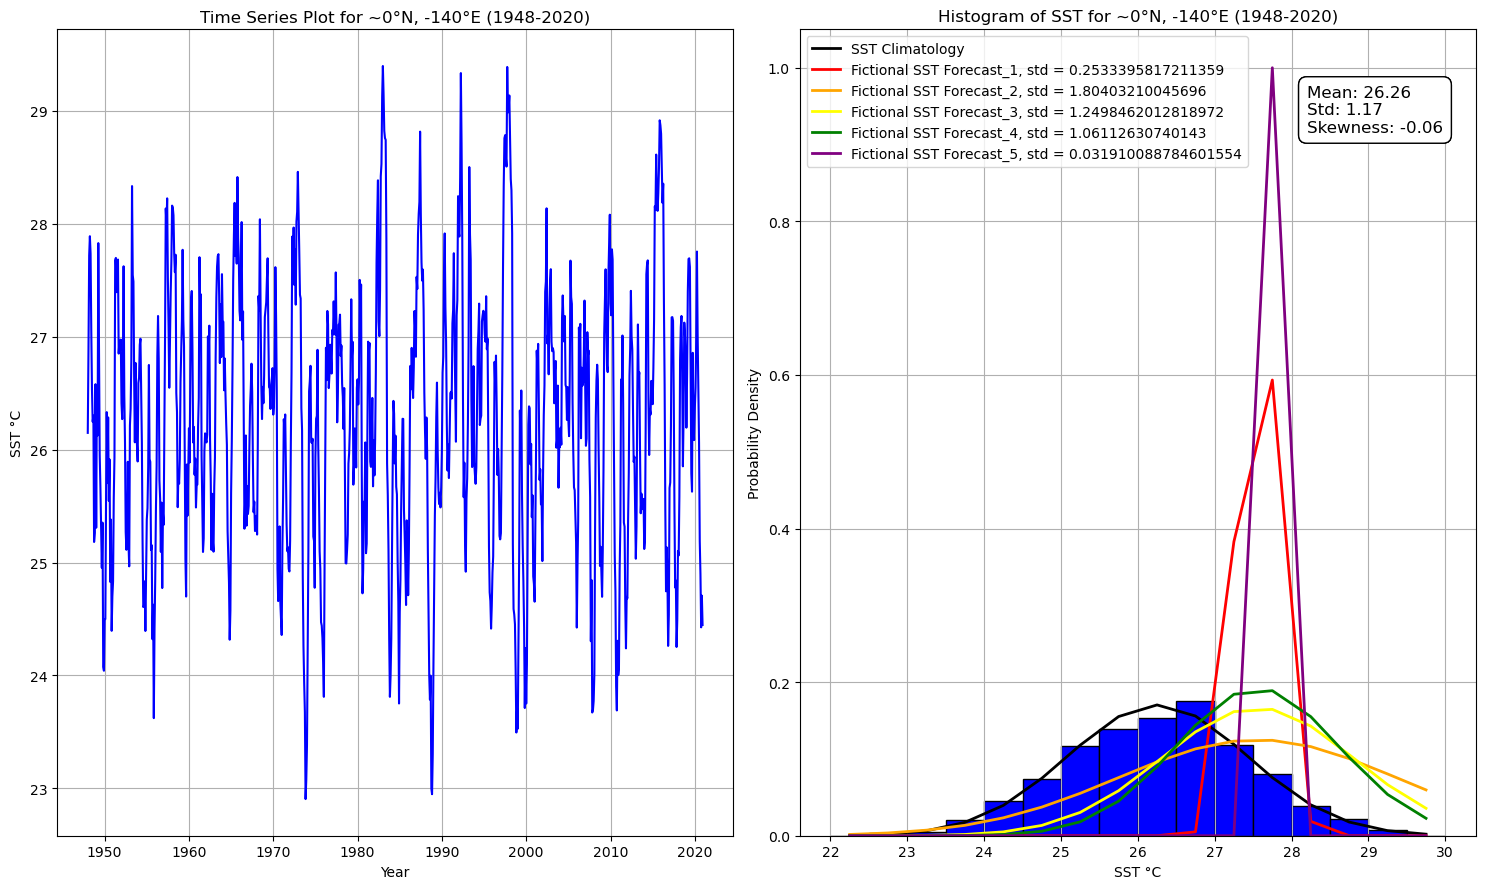

In [69]:
# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(15, 9))

# Plotting the time series
plt.subplot(1, 2, 1)
plt.plot(time_axis, sst_eq_pac, color='Blue')
plt.xlabel('Year')
plt.ylabel('SST °C')
plt.title(f'Time Series Plot for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2020)')
plt.grid()

# Create the histogram
plt.subplot(1, 2, 2)

bins = np.arange(22, 30.5, 0.5)

hist, bin_edges = np.histogram(sst_eq_pac, bins=bins, density=True)

# Adjust the histogram values by multiplying with 0.5
hist_adjusted = hist * 0.5

# Adjust the bin_edges to shift the bars to the right
adjusted_bin_edges = bin_edges[:-1] + np.diff(bin_edges) / 2

# Plot the adjusted histogram
plt.bar(adjusted_bin_edges, hist_adjusted, width=np.diff(bin_edges), color='blue', edgecolor='black')
#plt.bar(bin_edges[:-1], hist_adjusted, width=np.diff(bin_edges), color='blue', edgecolor='black')

plt.xlabel('SST °C')
plt.ylabel('Probability Density')
plt.title(f'Histogram of SST for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2020)')
plt.grid()


# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


#calculate area under histogram
bin_widths = np.diff(bin_edges)
area_under_histogram = np.sum(hist * bin_widths)
print("Area under histogram = ", area_under_histogram)

# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

#linespacing = 0.5
n_space = 0.5

# Adding a normal probability density function curve
bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p = norm.pdf(bin_centers, mean_value, std_value)
area_under_curve = np.trapz(p, bin_centers)                # Calculate the area under the curve using the trapezoidal rule
p_normalized = (p / area_under_curve) * n_space            # Normalize the PDF
plt.plot(bin_centers, p_normalized, 'k', linewidth=2, label='SST Climatology')


###############################################################################################
#start of fictional forecasts
import random

# Adding a normal probability density function curve for forecasted fictional values
xmin, xmax = plt.xlim()

# Generate a random float between 0 and 2
random_value_1 = random.uniform(0, 2)
random_value_2 = random.uniform(0, 2)
random_value_3 = random.uniform(0, 2)
random_value_4 = random.uniform(0, 2)
random_value_5 = random.uniform(0, 2)

bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p_new = norm.pdf(bin_centers, mean_value + 1.3, random_value_1)
area_under_curve_f = np.trapz(p_new, bin_centers)
p_normalized_f = (p_new / area_under_curve_f) * n_space    # Normalize the PDF
plt.plot(bin_centers, p_normalized_f, color='red', linewidth=2, 
         label = f'Fictional SST Forecast_1, std = {random_value_1}')

bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p_new = norm.pdf(bin_centers, mean_value + 1.3, random_value_2)
area_under_curve_f = np.trapz(p_new, bin_centers)
p_normalized_f = (p_new / area_under_curve_f) * n_space    # Normalize the PDF
plt.plot(bin_centers, p_normalized_f, color='orange', linewidth=2,
         label = f'Fictional SST Forecast_2, std = {random_value_2}')

bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p_new = norm.pdf(bin_centers, mean_value + 1.3, random_value_3)
area_under_curve_f = np.trapz(p_new, bin_centers)
p_normalized_f = (p_new / area_under_curve_f) * n_space    # Normalize the PDF
plt.plot(bin_centers, p_normalized_f, color='yellow', linewidth=2,
         label = f'Fictional SST Forecast_3, std = {random_value_3}')

bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p_new = norm.pdf(bin_centers, mean_value + 1.3, random_value_4)
area_under_curve_f = np.trapz(p_new, bin_centers)
p_normalized_f = (p_new / area_under_curve_f) * n_space    # Normalize the PDF
plt.plot(bin_centers, p_normalized_f, color='green', linewidth=2,
         label = f'Fictional SST Forecast_4, std = {random_value_4}')

bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p_new = norm.pdf(bin_centers, mean_value + 1.3, random_value_5)
area_under_curve_f = np.trapz(p_new, bin_centers)
p_normalized_f = (p_new / area_under_curve_f) * n_space    # Normalize the PDF
plt.plot(bin_centers, p_normalized_f, color='purple', linewidth=2,
         label = f'Fictional SST Forecast_5, std = {random_value_5}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.legend(loc='upper left')

# Display the plot
plt.show()


write 4 to 5 sentences about how changes in the standard deviation impact the 
predictability of your scenario


Thre is a clear relationship with stadard deviation and predictability as seen in the 
right plot above. In the cases where standard devaitions are low, forecasts 1 and 5, 
there is high confidence of above average SST's given the spread in both distributions.
for forecast 5, where standard deviations fall below a tenth of a degree celsius, there
is a 100% confidence (at least in regard to that forecast) that temperatures will fall
between 27.25 and 28.25 degrees, meaning that if an above avearge temperature 
constitutes a value of 27.5 degrees, we are almsot 100% confident in regards to that
forecast that temperatures for this region will be above average. However, in forecast 2
where standard deviations almost become 2°C, while the average of the forecast calls for
a temperate warmer than the climatological average, there is still a considerable spread
of values that fall below that climatological average, meaning confidence is low in
a potential forecast, and that the predictability using this forecast isn't very high 
since there is almost an equal chance of below average temperatures as climatology. 
These two extreme scenarios indicate that the spread of our forecast, given by standard
deviation, are highly important factors to consider in regards to forecast confidence
and predictability of a solution

In [117]:
path_prec = '/Users/cjmasiel/Desktop/Larson_Class/Hw_1/prate.sfc.mon.mean.194801-202012.nc'

#open our netCDF file using xarray
dataset_prec = xr.open_dataset(path_prec)    
dataset_prec

<xarray.Dataset>
Dimensions:  (lat: 94, lon: 192, time: 876)
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Data variables:
    prate    (time, lat, lon) float32 ...
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121013
    history:        Mon Jul  5 23:55:54 1999: ncrcat prate.mon.mean.nc /Datas...
    title:          monthly mean prate.sfc from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [182]:
#Read in and store the variables precipitation rate, lat, and lon
p_p = dataset_prec['prate']
lat_p = dataset_prec['lat']
lon_p = dataset_prec['lon']

In [183]:
#First location of interest is Miami Florida: 25.7°N, -80.2°W

In [184]:
#Now, we want to look at a specific indice, of lat and lon, we will use numpy to achieve this

#specify what latitude you are interested in looking at
lat_of_interest = 25.7
index_lat = np.abs(lat_p - lat_of_interest).argmin()

print("Index where latitude is closest to 25.7:", index_lat)

Index where latitude is closest to 25.7: <xarray.DataArray 'lat' ()>
array(33)


In [185]:
#Now, we want to look at a specific indice, of lat and lon, we will use numpy to achieve this

#specify what longitude you are interested in looking at
lon_of_miami = -80.2 

lon_of_interest = 360 + lon_of_miami #get that long of Raleigh in Degrees East

# Find the index where the latitude value is closest to 15
index_lon = np.abs(lon_p - lon_of_interest).argmin()

print("Index where longitude is closest to 80.2°W:", index_lon)

Index where longitude is closest to 80.2°W: <xarray.DataArray 'lon' ()>
array(149)


In [186]:
p_miami = p_p[:,index_lat,index_lon] * 84600.0

In [187]:
# Spacing for each month (1/12th of a year)
spacing = 1 / 12

# Generating the time axis from 1948 to just before 2021 with monthly spacing
time_axis = np.arange(1948, 2021, spacing)

# Convert DataArray to NumPy array
p_miami = np.asarray(p_miami)

# Calculate mean, std, and skewness
mean_value = np.mean(p_miami)
std_value = np.std(p_miami)
skewness_value = skew(p_miami)

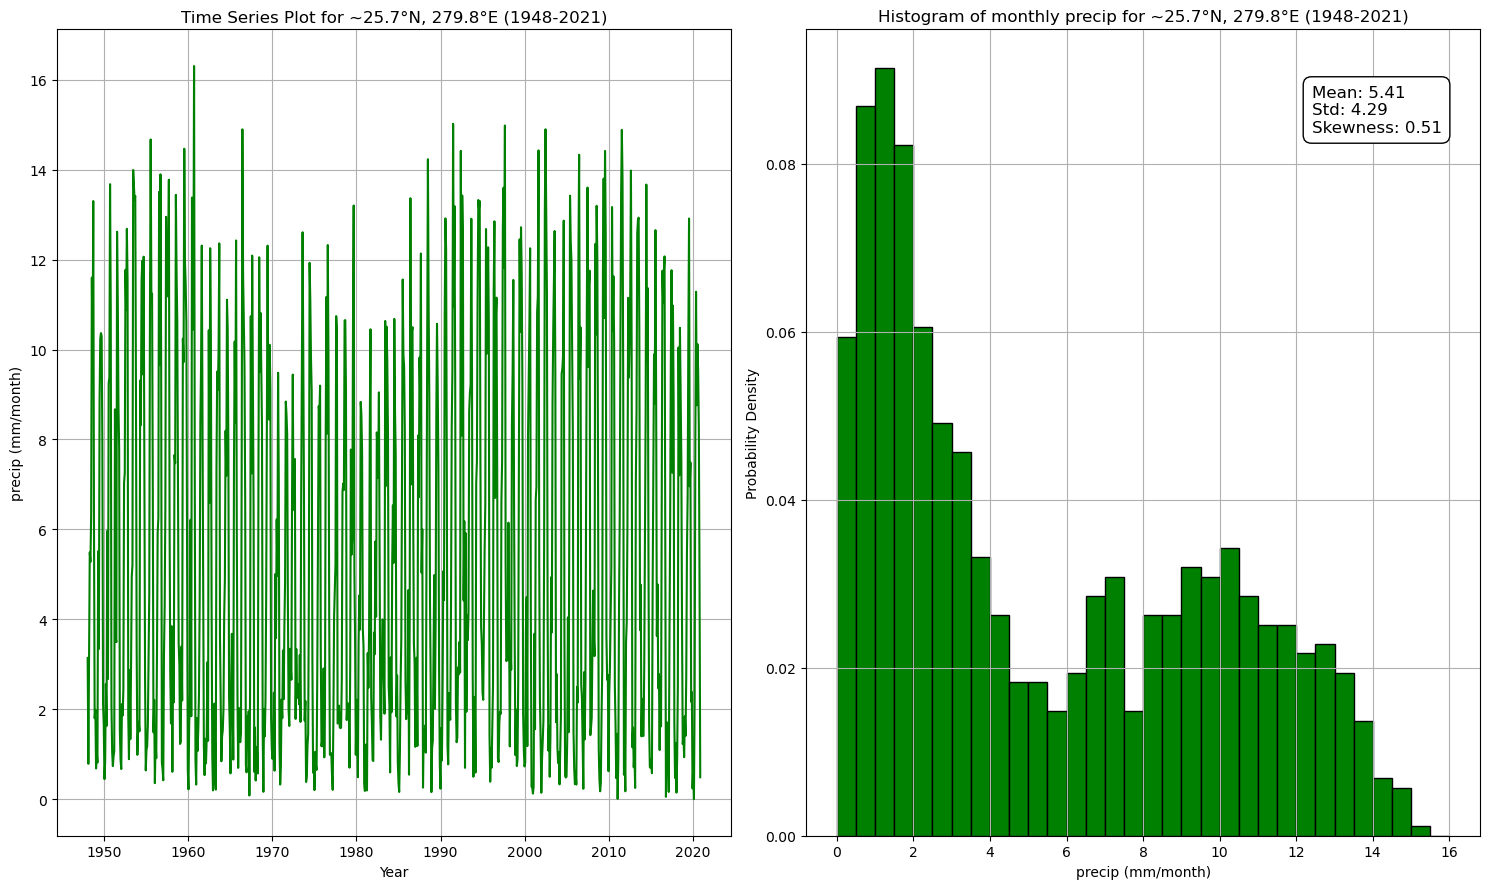

In [188]:
# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(15, 9))

# Plotting the time series
plt.subplot(1, 2, 1)
plt.plot(time_axis, p_miami, color='green')
plt.xlabel('Year')
plt.ylabel('precip (mm/month)')
plt.title(f'Time Series Plot for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2021)')
plt.grid()

# Create the histogram
plt.subplot(1, 2, 2)

#first, specify our bins, you have to change these values manually
bins = np.arange(0, 16.5, 0.5)

hist, bin_edges = np.histogram(p_miami, bins=bins, density=True)

# Adjust the histogram values by multiplying with 0.5
hist_adjusted = hist * 0.5

# Plot the adjusted histogram
plt.bar(bin_edges[:-1], hist_adjusted, width=np.diff(bin_edges),align='edge', color='green', edgecolor='black')

plt.xlabel('precip (mm/month)')
plt.ylabel('Probability Density')
plt.title(f'Histogram of monthly precip for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2021)')
plt.grid()


# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [189]:
#This is for every month, now let's just look at months 2-4 of each year

# Start from the 3rd index and then jump every 12th index
February_array = p_miami[1::12]
March_array = p_miami[2::12]
April_array = p_miami[3::12]
   

In [190]:
# Spacing for each month (1/12th of a year)
spacing = 1 

# Generating the time axis from 1948 to just before 2021 with monthly spacing
time_axis = np.arange(1948, 2021, spacing)

In [191]:
#Now, lets create an array of three month running average of precip

#we will iterate over each element of the feb,mar,apr arrays, add them together, divide them by 3, append them 
#to a new list, then plot
FMA_avg = []

for i in range(len(February_array)):
    FMA_tot = February_array[i] + March_array[i] + April_array[i]
    FMA_avg.append(FMA_tot/3)

print(FMA_avg)

[3.114807446797689, 2.451110521952311, 1.6707447369893391, 3.5609941482543945, 2.1336275736490884, 3.0964978535970054, 4.179603576660156, 2.019132932027181, 1.7907727559407551, 4.672418594360352, 2.027642567952474, 2.287507692972819, 3.403519948323568, 1.643495241800944, 1.7158835728963215, 1.162082354227702, 2.529005209604899, 2.9123153686523438, 1.3722987174987793, 1.1684558391571045, 0.9148961702982584, 2.6991100311279297, 1.467491626739502, 2.4395853678385415, 2.998866399129232, 2.6222941080729165, 1.0473451614379883, 0.8178582191467285, 1.9631671905517578, 0.8504751523335775, 1.9414369265238445, 1.8763856887817383, 1.795268217722575, 0.8192123572031657, 4.219449679056804, 3.5691843032836914, 3.4404290517171225, 1.2670776844024658, 2.367980639139811, 2.46105686823527, 1.346112887064616, 3.1086769104003906, 1.6690861384073894, 2.6493762334187827, 3.0656509399414062, 3.1886749267578125, 3.2973219553629556, 3.898771603902181, 1.6025433540344238, 3.4922402699788413, 3.695815086364746, 

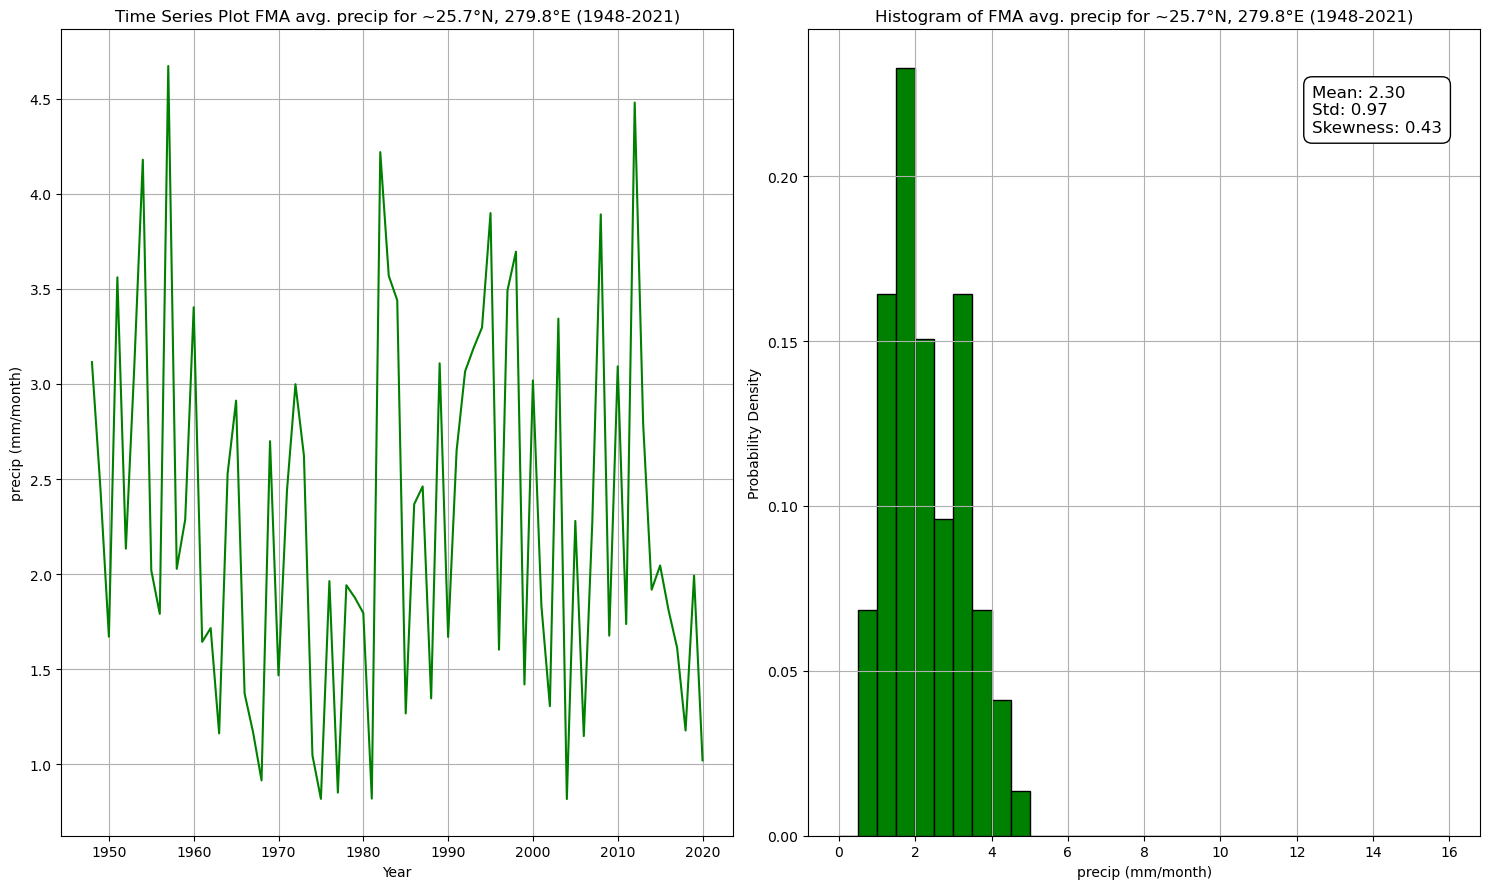

In [192]:
# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(15, 9))

# Plotting the time series
plt.subplot(1, 2, 1)
plt.plot(time_axis, FMA_avg, color='green')
plt.xlabel('Year')
plt.ylabel('precip (mm/month)')
plt.title(f'Time Series Plot FMA avg. precip for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2021)')
plt.grid()

# Create the histogram
plt.subplot(1, 2, 2)

#first, specify our bins, you have to change these values manually
bins = np.arange(0, 16.5, 0.5)

hist, bin_edges = np.histogram(FMA_avg, bins=bins, density=True)

# Adjust the histogram values by multiplying with 0.5
hist_adjusted = hist * 0.5

# Plot the adjusted histogram
plt.bar(bin_edges[:-1], hist_adjusted, width=np.diff(bin_edges), align='edge', color='green', edgecolor='black')

plt.xlabel('precip (mm/month)')
plt.ylabel('Probability Density')
plt.title(f'Histogram of FMA avg. precip for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2021)')
plt.grid()

# Convert DataArray to NumPy array
FMA_avg = np.asarray(FMA_avg)

# Calculate mean, std, and skewness
mean_value = np.mean(FMA_avg)
std_value = np.std(FMA_avg)
skewness_value = skew(FMA_avg)

# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

Area under histogram =  1.0


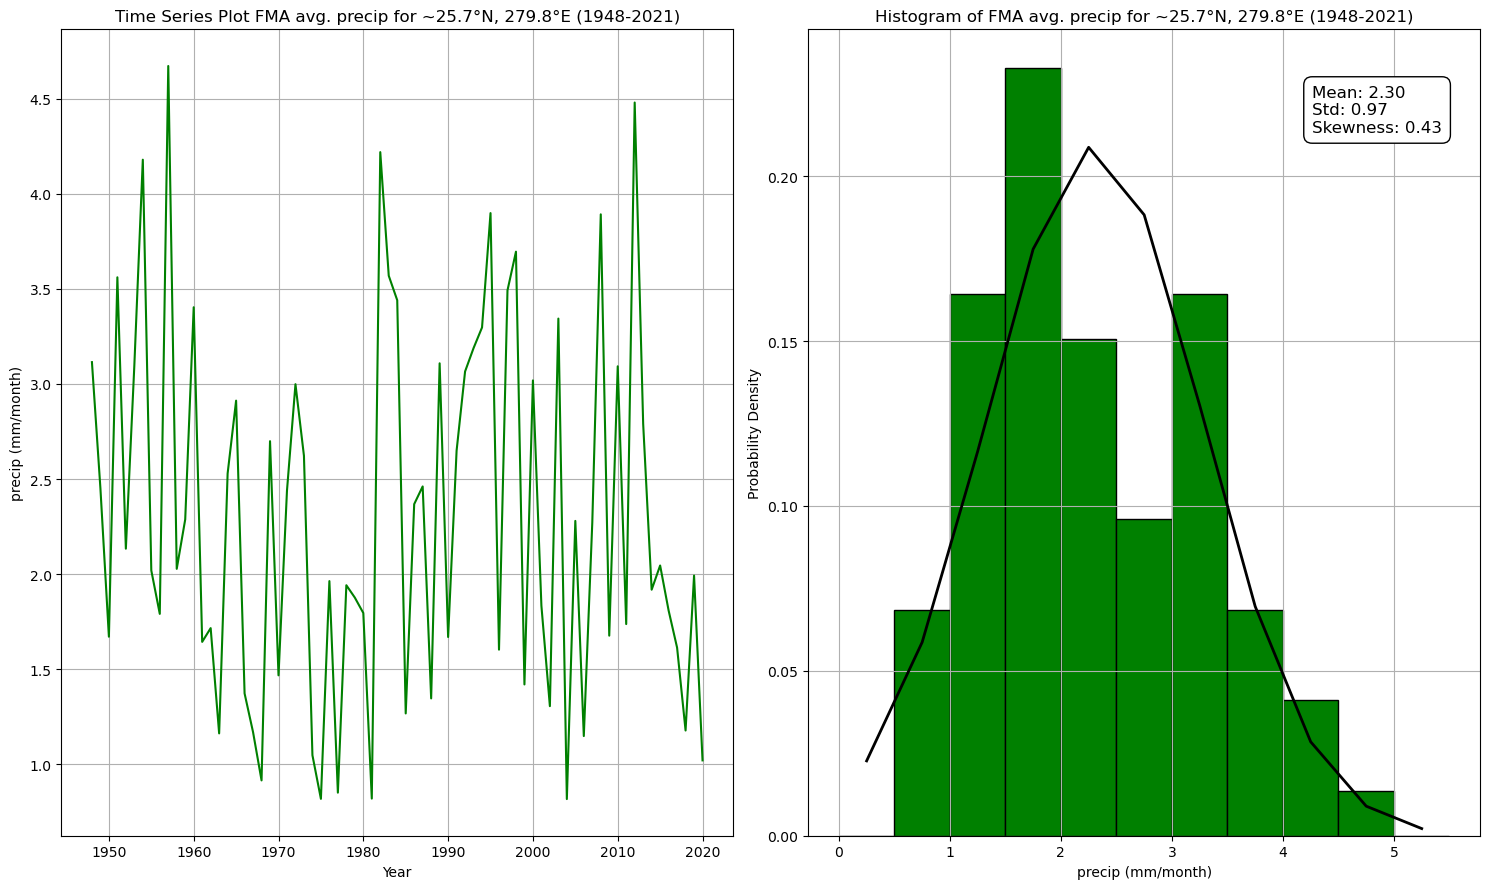

In [193]:
# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(15, 9))

# Plotting the time series
plt.subplot(1, 2, 1)
plt.plot(time_axis, FMA_avg, color='green')
plt.xlabel('Year')
plt.ylabel('precip (mm/month)')
plt.title(f'Time Series Plot FMA avg. precip for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2021)')
plt.grid()

# Create the histogram
plt.subplot(1, 2, 2)

#first, specify our bins, you have to change these values manually
bins = np.arange(0, 6, 0.5)

hist, bin_edges = np.histogram(FMA_avg, bins=bins, density=True)

# Adjust the histogram values by multiplying with 0.5
hist_adjusted = hist * 0.5

# Plot the adjusted histogram
plt.bar(bin_edges[:-1], hist_adjusted, width=np.diff(bin_edges), align='edge', color='green', edgecolor='black')

plt.xlabel('precip (mm/month)')
plt.ylabel('Probability Density')
plt.title(f'Histogram of FMA avg. precip for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2021)')
plt.grid()

#calculate area under histogram
bin_widths = np.diff(bin_edges)
area_under_histogram = np.sum(hist * bin_widths)
print("Area under histogram = ", area_under_histogram)

# Convert DataArray to NumPy array
FMA_avg = np.asarray(FMA_avg)

# Calculate mean, std, and skewness
mean_value = np.mean(FMA_avg)
std_value = np.std(FMA_avg)
skewness_value = skew(FMA_avg)

# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

#linespacing = 0.5
n_space = 0.5

# Adding a normal probability density function curve
bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p = norm.pdf(bin_centers, mean_value, std_value)
area_under_curve = np.trapz(p, bin_centers)                # Calculate the area under the curve using the trapezoidal rule
p_normalized = (p / area_under_curve) * n_space            # Normalize the PDF
plt.plot(bin_centers, p_normalized, 'k', linewidth=2, label='SST Climatology')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

Area under histogram =  1.0


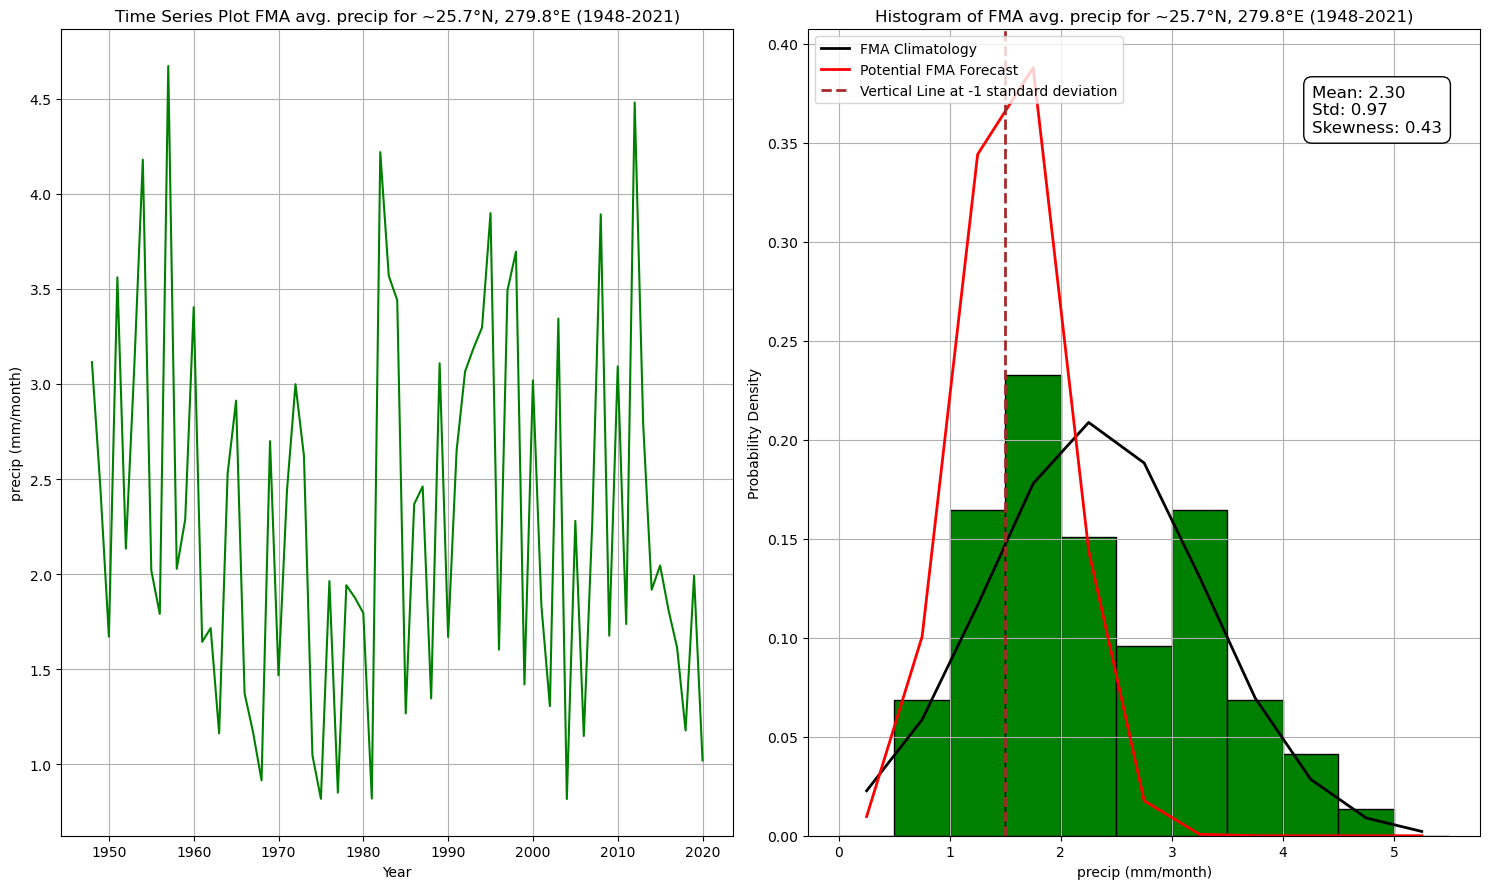

In [194]:
# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(15, 9))

# Plotting the time series
plt.subplot(1, 2, 1)
plt.plot(time_axis, FMA_avg, color='green')
plt.xlabel('Year')
plt.ylabel('precip (mm/month)')
plt.title(f'Time Series Plot FMA avg. precip for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2021)')
plt.grid()

# Create the histogram
plt.subplot(1, 2, 2)

#first, specify our bins, you have to change these values manually
bins = np.arange(0, 6, 0.5)

hist, bin_edges = np.histogram(FMA_avg, bins=bins, density=True)

# Adjust the histogram values by multiplying with 0.5
hist_adjusted = hist * 0.5

# Plot the adjusted histogram
plt.bar(bin_edges[:-1], hist_adjusted, width=np.diff(bin_edges), align='edge', color='green', edgecolor='black')

plt.xlabel('precip (mm/month)')
plt.ylabel('Probability Density')
plt.title(f'Histogram of FMA avg. precip for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2021)')
plt.grid()

#calculate area under histogram
bin_widths = np.diff(bin_edges)
area_under_histogram = np.sum(hist * bin_widths)
print("Area under histogram = ", area_under_histogram)

# Convert DataArray to NumPy array
FMA_avg = np.asarray(FMA_avg)

# Calculate mean, std, and skewness
mean_value = np.mean(FMA_avg)
std_value = np.std(FMA_avg)
skewness_value = skew(FMA_avg)

# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

#linespacing = 0.5
n_space = 0.5

# Adding a normal probability density function curve
bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p = norm.pdf(bin_centers, mean_value, std_value)
area_under_curve = np.trapz(p, bin_centers)                # Calculate the area under the curve using the trapezoidal rule
p_normalized = (p / area_under_curve) * n_space            # Normalize the PDF
plt.plot(bin_centers, p_normalized, 'k', linewidth=2, label='FMA Climatology')

# Adding a normal probability density function curve forecasted fictional values
xmin, xmax = plt.xlim()

bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p_new = norm.pdf(bin_centers, mean_value - .75, std_value-.5)
area_under_curve_f = np.trapz(p_new, bin_centers)
p_normalized_f = (p_new / area_under_curve_f) * n_space    # Normalize the PDF
plt.plot(bin_centers, p_normalized_f, 'red', linewidth=2, label = 'Potential FMA Forecast')

#Next, add a vertical line at +1 sigma to represent what constitutes a warmer than average temp

one_std = round(2 * (mean_value-std_value))/2
plt.axvline(x=one_std, color= "brown", linestyle='--', linewidth=2, label='Vertical Line at -1 standard deviation')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.legend(loc='upper left')

# Display the plot
plt.show()

In [195]:
#Second location of interest is Detroit Michigan: 42.3°N, -83.0°W

In [196]:
#Now, we want to look at a specific indice, of lat and lon, we will use numpy to achieve this

#specify what latitude you are interested in looking at
lat_of_interest = 42.3
index_lat_2 = np.abs(lat_p - lat_of_interest).argmin()

print("Index where latitude is closest to 42.3°N:", index_lat)

Index where latitude is closest to 42.3°N: <xarray.DataArray 'lat' ()>
array(33)


In [197]:
#Now, we want to look at a specific indice, of lat and lon, we will use numpy to achieve this

#specify what longitude you are interested in looking at
lon_of_det = -83.0 

lon_of_interest = 360 + lon_of_det #get that long of Raleigh in Degrees East

# Find the index where the latitude value is closest to 15
index_lon_2 = np.abs(lon_p - lon_of_interest).argmin()

print("Index where longitude is closest to 83.0°W:", index_lon)

Index where longitude is closest to 83.0°W: <xarray.DataArray 'lon' ()>
array(149)


In [198]:
p_det = p_p[:,index_lat_2,index_lon_2] * 84600.0

In [199]:
# Spacing for each month (1/12th of a year)
spacing = 1 / 12

# Generating the time axis from 1948 to just before 2021 with monthly spacing
time_axis = np.arange(1948, 2021, spacing)

# Convert DataArray to NumPy array
p_det = np.asarray(p_det)

# Calculate mean, std, and skewness
mean_value = np.mean(p_det)
std_value = np.std(p_det)
skewness_value = skew(p_det)

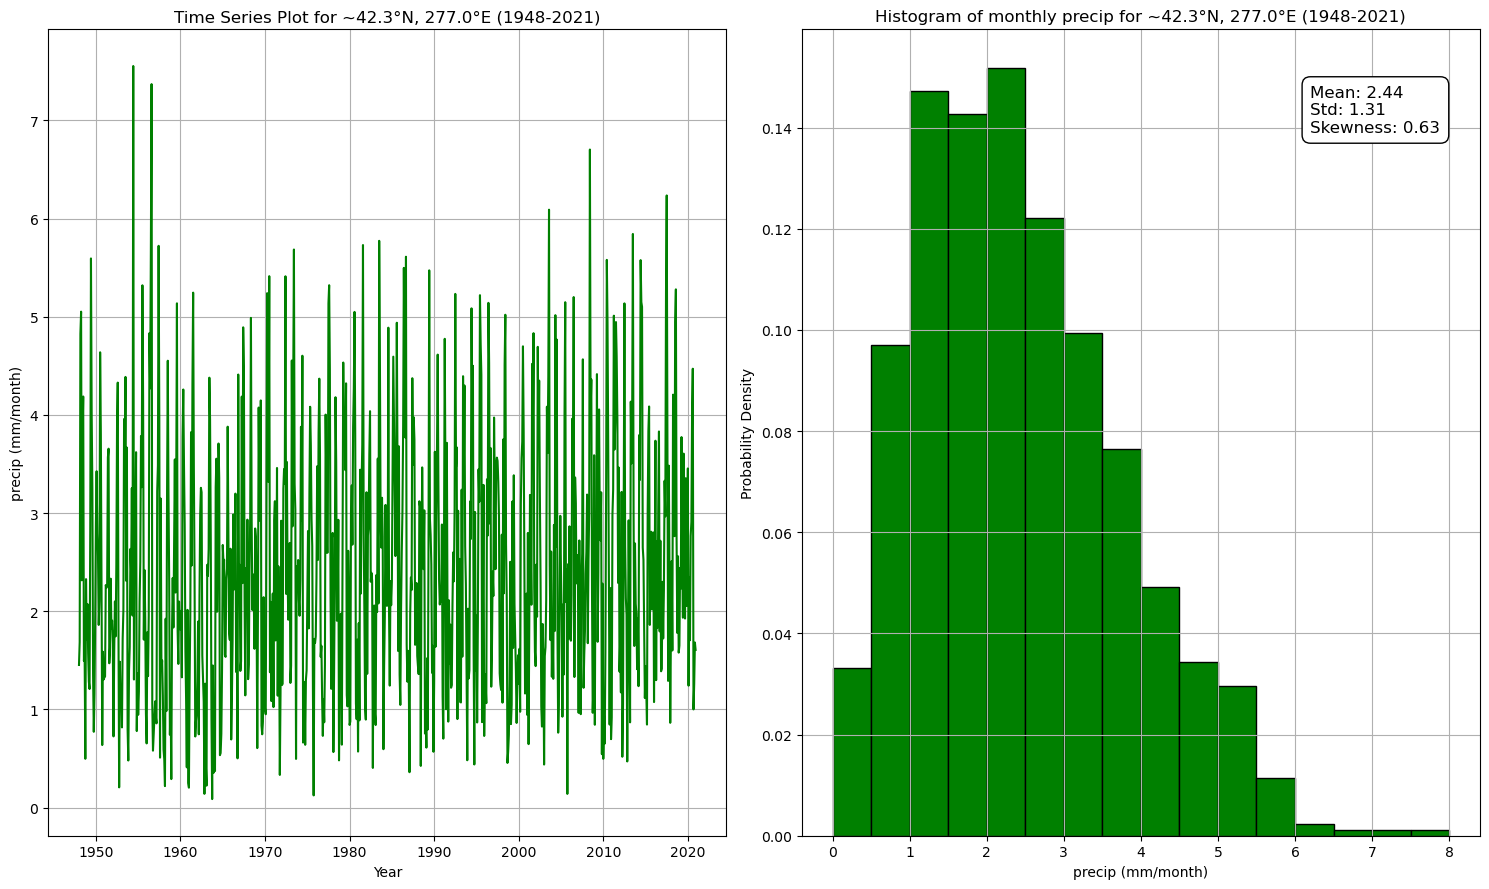

In [200]:
# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(15, 9))

# Plotting the time series
plt.subplot(1, 2, 1)
plt.plot(time_axis, p_det, color='green')
plt.xlabel('Year')
plt.ylabel('precip (mm/month)')
plt.title(f'Time Series Plot for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2021)')
plt.grid()

# Create the histogram
plt.subplot(1, 2, 2)

#first, specify our bins, you have to change these values manually
bins = np.arange(0, 8.5, 0.5)

hist, bin_edges = np.histogram(p_det, bins=bins, density=True)

# Adjust the histogram values by multiplying with 0.5
hist_adjusted = hist * 0.5

# Plot the adjusted histogram
plt.bar(bin_edges[:-1], hist_adjusted, width=np.diff(bin_edges),align='edge', color='green', edgecolor='black')

plt.xlabel('precip (mm/month)')
plt.ylabel('Probability Density')
plt.title(f'Histogram of monthly precip for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2021)')
plt.grid()


# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [201]:
#This is for every month, now let's just look at months 2-4 of each year

# Start from the 3rd index and then jump every 12th index
February_array_d = p_det[1::12]
March_array_d = p_det[2::12]
April_array_d = p_det[3::12]

In [202]:
# Spacing for each month (1/12th of a year)
spacing = 1 

# Generating the time axis from 1948 to just before 2021 with monthly spacing
time_axis = np.arange(1948, 2021, spacing)

In [203]:
#Now, lets create an array of three month running average of precip

#we will iterate over each element of the feb,mar,apr arrays, add them together, divide them by 3, append them 
#to a new list, then plot
FMA_avg_d = []

for i in range(len(February_array)):
    FMA_tot_d = February_array_d[i] + March_array_d[i] + April_array_d[i]
    FMA_avg_d.append(FMA_tot_d/3)

print(FMA_avg_d)

[3.8542582194010415, 1.3537074724833171, 2.9249954223632812, 1.9458478291829426, 1.4757165908813477, 1.5150569279988606, 2.7611220677693686, 1.9275682767232258, 1.6928205490112305, 1.6689688364664714, 0.8787150382995605, 2.3079848289489746, 2.3694682121276855, 2.3673149744669595, 1.5988097190856934, 1.6849786440531414, 2.3964366912841797, 2.192307154337565, 1.9397729237874348, 2.3567241032918296, 2.2844578425089517, 2.2507476806640625, 3.0196056365966797, 2.583222230275472, 2.652212142944336, 2.955348332722982, 2.72013250986735, 2.618006388346354, 2.7797438303629556, 2.915114720662435, 1.4464759826660156, 2.5869312286376953, 2.3871776262919107, 2.069500287373861, 2.331883430480957, 1.7338892618815105, 2.15764586130778, 4.015050570170085, 2.5360663731892905, 1.5580485661824544, 1.9731958707173665, 0.9753839174906412, 2.7377490997314453, 2.7383295694986978, 1.969747543334961, 1.794413725535075, 1.943332354227702, 2.0629151662190757, 1.8927383422851562, 3.2250455220540366, 2.3335682551066

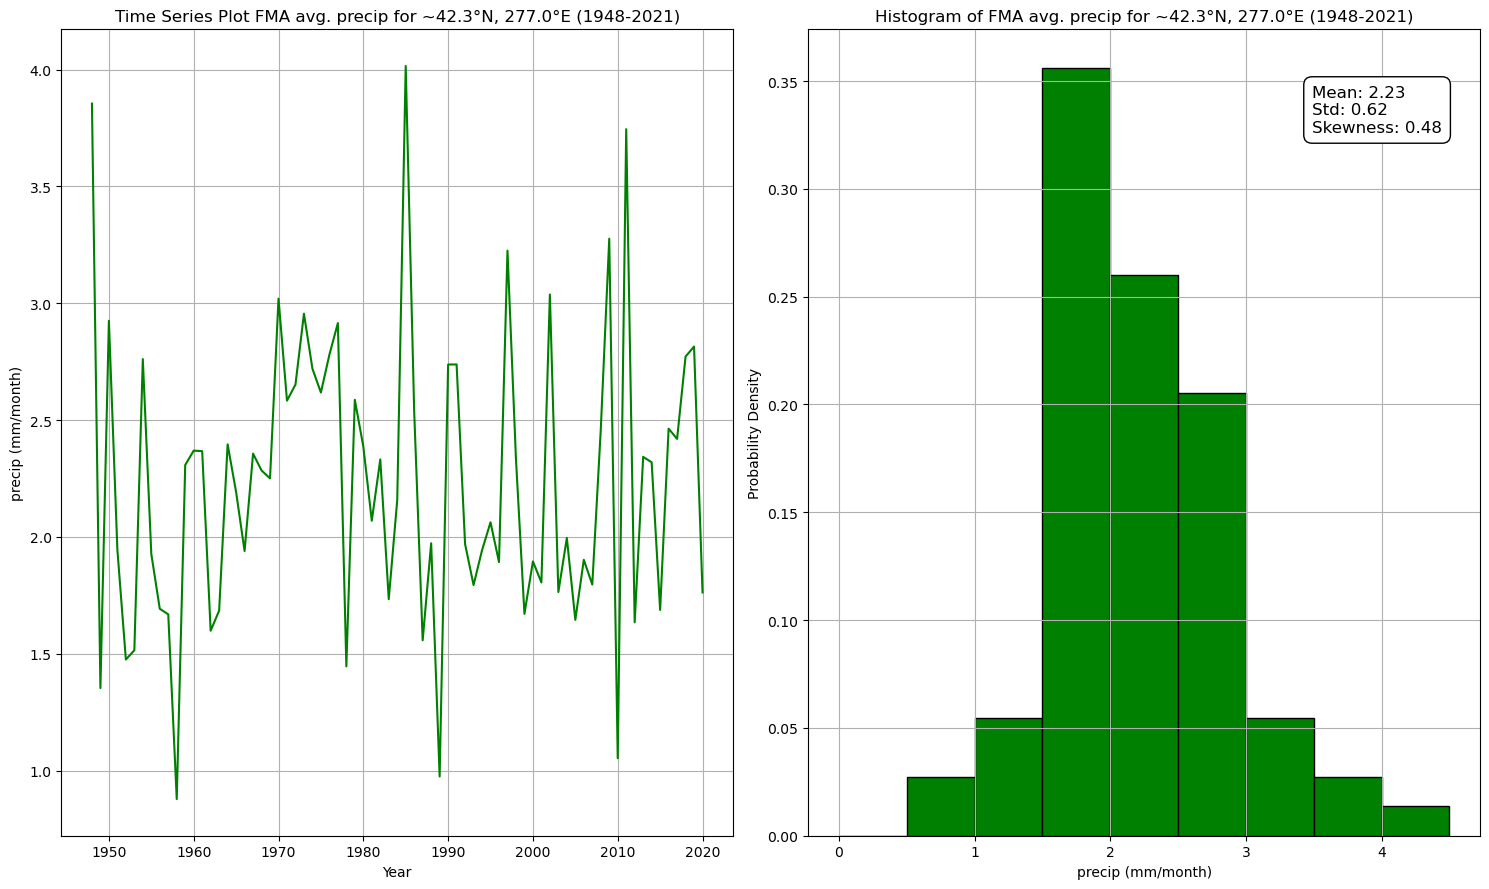

In [204]:
# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(15, 9))

# Plotting the time series
plt.subplot(1, 2, 1)
plt.plot(time_axis, FMA_avg_d, color='green')
plt.xlabel('Year')
plt.ylabel('precip (mm/month)')
plt.title(f'Time Series Plot FMA avg. precip for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2021)')
plt.grid()

# Create the histogram
plt.subplot(1, 2, 2)

#first, specify our bins, you have to change these values manually
bins = np.arange(0, 5.0, 0.5)

hist, bin_edges = np.histogram(FMA_avg_d, bins=bins, density=True)

# Adjust the histogram values by multiplying with 0.5
hist_adjusted = hist * 0.5

# Plot the adjusted histogram
plt.bar(bin_edges[:-1], hist_adjusted, width=np.diff(bin_edges), align='edge', color='green', edgecolor='black')

plt.xlabel('precip (mm/month)')
plt.ylabel('Probability Density')
plt.title(f'Histogram of FMA avg. precip for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2021)')
plt.grid()

# Convert DataArray to NumPy array
FMA_avg_d = np.asarray(FMA_avg_d)

# Calculate mean, std, and skewness
mean_value = np.mean(FMA_avg_d)
std_value = np.std(FMA_avg_d)
skewness_value = skew(FMA_avg_d)

# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

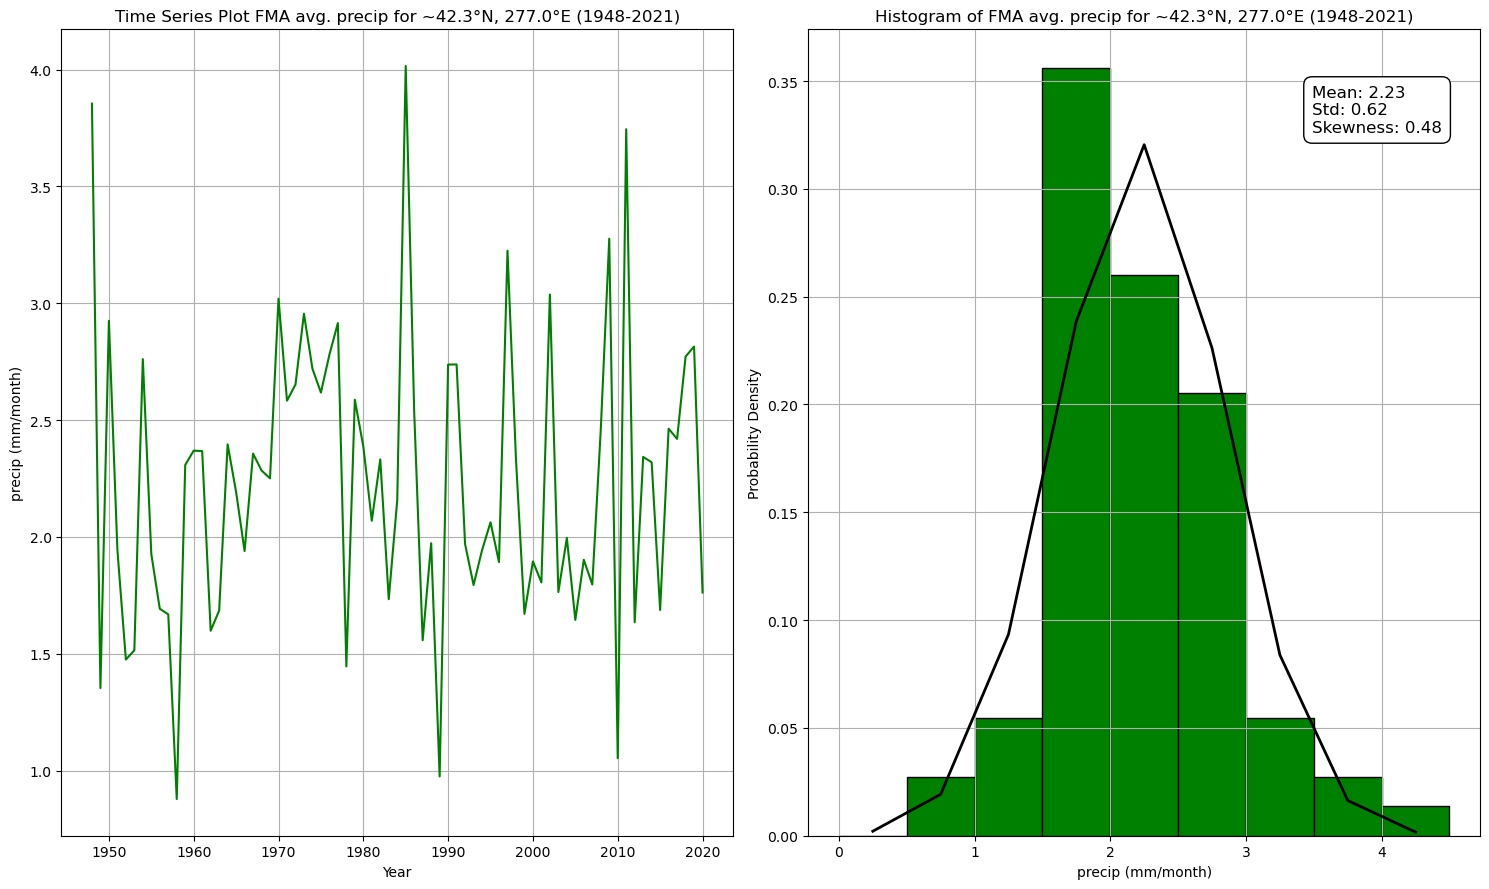

In [205]:
# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(15, 9))

# Plotting the time series
plt.subplot(1, 2, 1)
plt.plot(time_axis, FMA_avg_d, color='green')
plt.xlabel('Year')
plt.ylabel('precip (mm/month)')
plt.title(f'Time Series Plot FMA avg. precip for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2021)')
plt.grid()

# Create the histogram
plt.subplot(1, 2, 2)

#first, specify our bins, you have to change these values manually
bins = np.arange(0, 5.0, 0.5)

hist, bin_edges = np.histogram(FMA_avg_d, bins=bins, density=True)

# Adjust the histogram values by multiplying with 0.5
hist_adjusted = hist * 0.5

# Plot the adjusted histogram
plt.bar(bin_edges[:-1], hist_adjusted, width=np.diff(bin_edges), align='edge', color='green', edgecolor='black')

plt.xlabel('precip (mm/month)')
plt.ylabel('Probability Density')
plt.title(f'Histogram of FMA avg. precip for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2021)')
plt.grid()

# Convert DataArray to NumPy array
FMA_avg_d = np.asarray(FMA_avg_d)

# Calculate mean, std, and skewness
mean_value = np.mean(FMA_avg_d)
std_value = np.std(FMA_avg_d)
skewness_value = skew(FMA_avg_d)

# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

#linespacing = 0.5
n_space = 0.5

# Adding a normal probability density function curve
bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p = norm.pdf(bin_centers, mean_value, std_value)
area_under_curve = np.trapz(p, bin_centers)                # Calculate the area under the curve using the trapezoidal rule
p_normalized = (p / area_under_curve) * n_space            # Normalize the PDF
plt.plot(bin_centers, p_normalized, 'k', linewidth=2, label='SST Climatology')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

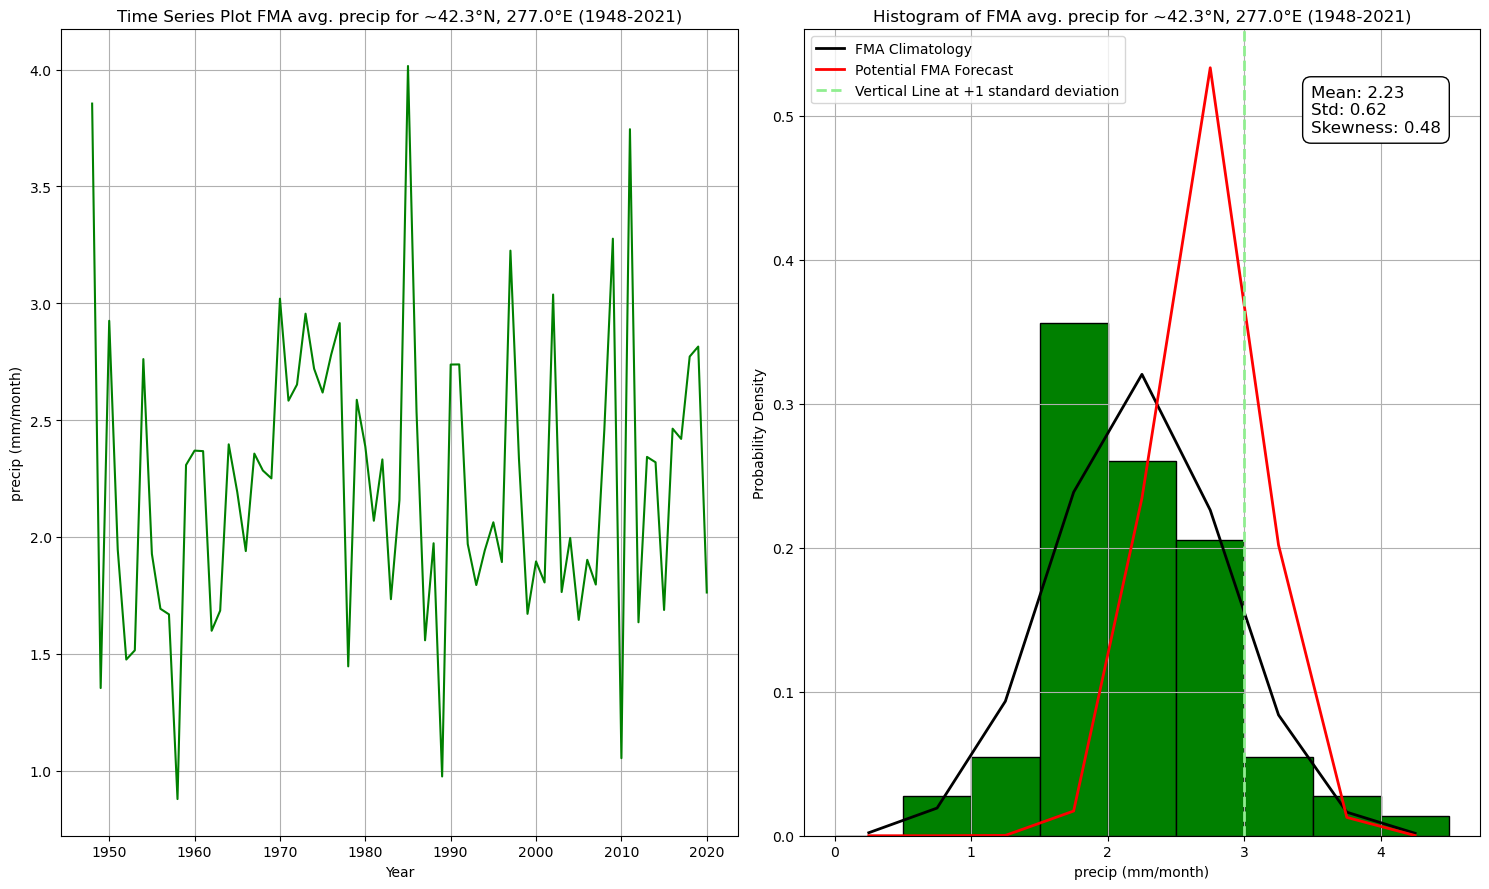

In [206]:
# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(15, 9))

# Plotting the time series
plt.subplot(1, 2, 1)
plt.plot(time_axis, FMA_avg_d, color='green')
plt.xlabel('Year')
plt.ylabel('precip (mm/month)')
plt.title(f'Time Series Plot FMA avg. precip for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2021)')
plt.grid()

# Create the histogram
plt.subplot(1, 2, 2)

#first, specify our bins, you have to change these values manually
bins = np.arange(0, 5.0, 0.5)

hist, bin_edges = np.histogram(FMA_avg_d, bins=bins, density=True)

# Adjust the histogram values by multiplying with 0.5
hist_adjusted = hist * 0.5

# Plot the adjusted histogram
plt.bar(bin_edges[:-1], hist_adjusted, width=np.diff(bin_edges), align='edge', color='green', edgecolor='black')

plt.xlabel('precip (mm/month)')
plt.ylabel('Probability Density')
plt.title(f'Histogram of FMA avg. precip for ~{lat_of_interest}°N, {lon_of_interest}°E (1948-2021)')
plt.grid()

# Convert DataArray to NumPy array
FMA_avg_d = np.asarray(FMA_avg_d)

# Calculate mean, std, and skewness
mean_value = np.mean(FMA_avg_d)
std_value = np.std(FMA_avg_d)
skewness_value = skew(FMA_avg_d)

# Adding a legend with mean, std, and skewness values using text
legend_text = f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}\nSkewness: {skewness_value:.2f}'
plt.gca().text(.75, 0.9, legend_text, transform=plt.gca().transAxes, fontsize=12, va='center', 
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

#linespacing = 0.5
n_space = 0.5

# Adding a normal probability density function curve
bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p = norm.pdf(bin_centers, mean_value, std_value)
area_under_curve = np.trapz(p, bin_centers)                # Calculate the area under the curve using the trapezoidal rule
p_normalized = (p / area_under_curve) * n_space            # Normalize the PDF
plt.plot(bin_centers, p_normalized, 'k', linewidth=2, label='FMA Climatology')

# Adding a normal probability density function curve forecasted fictional values
xmin, xmax = plt.xlim()

bin_centers = 0.5 * (bins[:-1] + bins[1:])                 # Calculate bin centers
p_new = norm.pdf(bin_centers, mean_value + .5, std_value -.25)
area_under_curve_f = np.trapz(p_new, bin_centers)
p_normalized_f = (p_new / area_under_curve_f) * n_space    # Normalize the PDF
plt.plot(bin_centers, p_normalized_f, 'red', linewidth=2, label = 'Potential FMA Forecast')

#Next, add a vertical line at +1 sigma to represent what constitutes a warmer than average temp

one_std = round(2 * (mean_value+std_value))/2
plt.axvline(x=one_std, color='#90EE90', linestyle='--', linewidth=2, label='Vertical Line at +1 standard deviation')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.legend(loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()